# CFG Final Project
## Our project question:
### What have the environmental impacts been on the SpaceX rocket launches, and how could SpaceX minimise their impact moving forward?
#### Subquestion A: How Do SpaceX Rocket Launches Compare Over Time in Terms of Environmental Impact?
#### Subquestion B: What is SpaceX's “Space Debris” Impact?
#### Subquestion C: How Do SpaceX Launches Compare with Other Countries/Locations and/or Companies in Terms of Environmental Impact? E.g. Fuel Emissions, fuel types
#### Bonus Machine learning Qs: Predict the amount of space debris is X amount of years.

### LOADING LIBRARIES

In [1]:
#needed for visualisation and reading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import textwrap

In [2]:
#needed for importing API 
import requests 
from pprint import pprint as pp 

In [3]:
#needed for data cleaning
import missingno as msno

In [4]:
#needed for the machine learning model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### LOADING DATA 

#### 1. Importing Launch and Re-Entry Spreadsheet 

In [5]:
#Please ensure that the "Launch and ...." sheet is in the same folder as the .pynb file, which it should be if you pulled from Git.

all_launch_df = pd.read_excel("Launch and re-entry database added company.xlsx", sheet_name="2019 launches")

In [6]:
all_launch_df.head(2)

,l,Day,Month,Year,Latitude,Longitude,Launch location,Rocket Type,Company,Booster fuel type,...,"Boosters mass (each, kg)","Boosters mass (total, kg)",Stage 1 mass (kg),Stage 2 mass (kg),Stage 3 mass (kg),Stage 4 mass (kg),Kerosene mass (kg),Hydrogen mass (kg),Hypergolic mass (kg),Solid fuel mass (kg)
0,17.083333,10.0,1.0,2019.0,28.246,102.027,Xichang,CZ-3B/G3,China Aerospace Science and Technology Corpora...,4 x Hypergolic,...,41100.0,164400.0,186200.0,32600.0,18200.0,0.0,0.0,18200.0,383200.0,0.0
1,15.516667,11.0,1.0,2019.0,34.632,-120.611,Vandenberg,Falcon-9 v1.2 (Block 5),SpaceX,NaN,...,0.0,0.0,418700.0,111500.0,0.0,0.0,530200.0,0.0,0.0,0.0


In [7]:
reentries_df = pd.read_excel("Launch and re-entry database added company.xlsx", sheet_name="2019 re-entries")

In [8]:
reentries_df.head(2)

,Controlled?,Time (UTC),Day,Month,Year,Latitude,Longitude,Rocket,Company,Name,Type,Part,Booster separation altitude (km),Booster mass (km),First stage mass (km),Second stage mass (km),Total Mass (km),NOx from re-entry (km)
0,N,1.516667,1.0,1.0,2019.0,7.823,54.164,CZ-2D,China Aerospace Science and Technology Corpora...,CZ-2D,Rocket body,NaN,NaN,NaN,NaN,NaN,5500.0,5500.0
1,N,7.966667,5.0,1.0,2019.0,-43.753,-179.976,Cosmos 2430,Russian Space Forces (RAF),Cosmos 2430,Payload,NaN,NaN,NaN,NaN,NaN,1900.0,1900.0


#### 2. Importing Space Decay Spreadsheet 

In [9]:
df_space_decay = pd.read_csv('space_decay.csv')
df_space_decay.head(2)

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:46:11,18 SPCS,ARIANE 42P+ DEB,1992-072J,EARTH,TEME,UTC,SGP4,...,MEDIUM,FR,1992.0,FRGUI,NaN,3195178,188614016,0 ARIANE 42P+ DEB,1 26741U 92072J 21304.94919376 .00000883 0...,2 26741 7.7156 90.2410 6528926 243.1216 38...
1,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,SL-8 DEB,1979-028C,EARTH,TEME,UTC,SGP4,...,SMALL,CIS,1979.0,PKMTR,NaN,3194950,188593285,0 SL-8 DEB,1 26743U 79028C 21304.68908982 .00000079 0...,2 26743 82.9193 299.1120 0030720 158.9093 201...


#### 3. Importing SpaceX API 

In [10]:
#v3 launches data 
endpoint = 'https://api.spacexdata.com/v3/launches'
response = requests.get(endpoint)
data = response.json()
pp(data)

[{'crew': None,
  'details': 'Engine failure at 33 seconds and loss of vehicle',
  'flight_number': 1,
  'is_tentative': False,
  'launch_date_local': '2006-03-25T10:30:00+12:00',
  'launch_date_unix': 1143239400,
  'launch_date_utc': '2006-03-24T22:30:00.000Z',
  'launch_failure_details': {'altitude': None,
                             'reason': 'merlin engine failure',
                             'time': 33},
  'launch_site': {'site_id': 'kwajalein_atoll',
                  'site_name': 'Kwajalein Atoll',
                  'site_name_long': 'Kwajalein Atoll Omelek Island'},
  'launch_success': False,
  'launch_window': 0,
  'launch_year': '2006',
  'links': {'article_link': 'https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html',
            'flickr_images': [],
            'mission_patch': 'https://images2.imgbox.com/40/e3/GypSkayF_o.png',
            'mission_patch_small': 'https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png',
            'presskit': None,
     

In [11]:
df = pd.read_json("https://api.spacexdata.com/v3/launches")
df

,flight_number,mission_name,mission_id,upcoming,launch_year,launch_date_unix,launch_date_utc,launch_date_local,is_tentative,tentative_max_precision,...,static_fire_date_unix,timeline,crew,last_date_update,last_ll_launch_date,last_ll_update,last_wiki_launch_date,last_wiki_revision,last_wiki_update,launch_date_source
0,1,FalconSat,[],False,2006,1143239400,2006-03-24T22:30:00.000Z,2006-03-25T10:30:00+12:00,False,hour,...,1.142554e+09,{'webcast_liftoff': 54},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,DemoSat,[],False,2007,1174439400,2007-03-21T01:10:00.000Z,2007-03-21T13:10:00+12:00,False,hour,...,NaN,{'webcast_liftoff': 60},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Trailblazer,[],False,2008,1217734440,2008-08-03T03:34:00.000Z,2008-08-03T15:34:00+12:00,False,hour,...,NaN,{'webcast_liftoff': 14},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,RatSat,[],False,2008,1222643700,2008-09-28T23:15:00.000Z,2008-09-28T11:15:00+12:00,False,hour,...,1.221869e+09,{'webcast_liftoff': 5},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,RazakSat,[],False,2009,1247456100,2009-07-13T03:35:00.000Z,2009-07-13T15:35:00+12:00,False,hour,...,NaN,{'webcast_liftoff': 5},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,Crew-1,[EE86F74],False,2020,1605486420,2020-11-16T00:27:00.000Z,2020-11-15T19:27:00-05:00,False,hour,...,NaN,None,[],2020-11-13T21:31:19.000Z,None,None,2020-11-16T00:27:00.000Z,90e9da15-25f7-11eb-badd-0e3a392f3e47,2020-11-13T21:31:19.000Z,wiki
107,108,Sentinel-6 Michael Freilich,[],False,2020,1605979020,2020-11-21T17:17:00.000Z,2020-11-21T09:17:00-08:00,False,hour,...,1.605619e+09,None,None,2020-11-17T19:27:21.000Z,2020-11-21T17:17:00.000Z,2020-11-05T23:48:07.000Z,2020-11-21T17:17:00.000Z,e93220d1-290a-11eb-bd82-0e4885cc0cd7,2020-11-17T19:27:21.000Z,wiki
108,109,Starlink-15 (v1.0),[],False,2020,1603553460,2020-10-24T15:31:00.000Z,2020-10-24T11:31:00-04:00,False,hour,...,1.605976e+09,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,110,CRS-21,[EE86F74],True,2020,1607271420,2020-12-06T16:17:00.000Z,2020-12-06T11:17:00-05:00,False,hour,...,NaN,None,None,2020-12-05T13:04:54.000Z,None,None,2020-12-06T16:17:00.000Z,774e7809-36fa-11eb-a5dc-0e33339b29dd,2020-12-05T13:04:54.000Z,wiki


In [12]:
#v4 past launches
spacex_url="https://api.spacexdata.com/v4/launches/past"
response_1 = requests.get(spacex_url)
data1 = response_1.json()
pp(data1)

[{'auto_update': True,
  'capsules': [],
  'cores': [{'core': '5e9e289df35918033d3b2623',
             'flight': 1,
             'gridfins': False,
             'landing_attempt': False,
             'landing_success': None,
             'landing_type': None,
             'landpad': None,
             'legs': False,
             'reused': False}],
  'crew': [],
  'date_local': '2006-03-25T10:30:00+12:00',
  'date_precision': 'hour',
  'date_unix': 1143239400,
  'date_utc': '2006-03-24T22:30:00.000Z',
  'details': 'Engine failure at 33 seconds and loss of vehicle',
  'failures': [{'altitude': None,
                'reason': 'merlin engine failure',
                'time': 33}],
  'fairings': {'recovered': False,
               'recovery_attempt': False,
               'reused': False,
               'ships': []},
  'flight_number': 1,
  'id': '5eb87cd9ffd86e000604b32a',
  'launch_library_id': None,
  'launchpad': '5e9e4502f5090995de566f86',
  'links': {'article': 'https://www.space.com/

In [13]:
data = pd.json_normalize(data1)
data

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[],None,https://youtu.be/NONM-xsKMSs,NONM-xsKMSs,None,None,NaN
183,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[],None,None,None,None,None,NaN
184,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[],None,https://youtu.be/ZlQHF_yBkMQ,ZlQHF_yBkMQ,None,None,NaN
185,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[],None,https://youtu.be/VVu2bSJJhgI,VVu2bSJJhgI,None,None,NaN


This DF has alot of IDs instead of names, making them hard to read and do anything with, so we needed to use the API again to turn the IDs into the names of the rocket etc. 

In [14]:
data = data[['rocket', 'success', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

In [15]:
# Convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

C:\Users\chhar\AppData\Local\Temp\ipykernel_16796\3012792575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date_utc']).dt.date


We have set up some empty lists. To get this information from the JSON, we need to create some functions with for loops to iterate throught the file and append the data to the empty lists.

In [16]:
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

#### Understanding the code for the functions
1. The function takes the parameter data (which is the JSON file from above)
2. The column ['rocket'] contains the rocket IDs - we have created a for loop saying for every rocket ID in the rocket column, the function sends a GET request to the SpaceX API to retrieve any additional data about the rocket, specifically to get the booster name. 
3. The name of each rocket is retrived from the API and it is appended to the BoosterVersion list. 

In [17]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list

def getBoosterVersion(data):
    for x in data['rocket']:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

getBoosterVersion(data)

In [18]:
#Testing the list is full of Booster names, sliced the list so we don't get the full list.
BoosterVersion[0:8]

['Falcon 1',
 'Falcon 1',
 'Falcon 1',
 'Falcon 1',
 'Falcon 1',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9']

In [19]:
#A list of all SpaceX Rockets
set(BoosterVersion)

{'Falcon 1', 'Falcon 9', 'Falcon Heavy'}

#### Understand the code for the function  

1. The function takes the parameter data (which is the JSON file from above)
2. The column ['rocket'] contains the rocket IDs - we have created a for loop saying for every rocket ID in the rocket column, the function sends a GET request to the SpaceX API to retrieve any additional data about the rocket, specifically to get the booster name. 
3. The name of each rocket is retrived from the API and it is appended to the BoosterVersion list. 

In [20]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
        response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
        Longitude.append(response['longitude'])
        Latitude.append(response['latitude'])
        LaunchSite.append(response['name'])
getLaunchSite(data)

#### Understand the code for the function  

Again the function is very similar to the above 2 functions - 

1. The function takes the parameter data (which is the JSON file from above)
2. The column ['payloads'] contains the payload IDs - we have created a for loop saying for every payload ID in the payload column, the function sends a GET request to the SpaceX API to retrieve any additional data about the payload, specifically to get the mass (in KG) and the type of orbit it is intended to reach. 
3. The Payload in kg and the Orbit information is appended to their respective lists.

In [21]:
# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for loads in data['payloads']:
        for load in loads:
            response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
            PayloadMass.append(response['mass_kg'])
            Orbit.append(response['orbit'])
getPayloadData(data)

#### Understand the code for the function  

The function is similar to the above functions, except it now uses an if/else statement- 

1. The function takes the parameter data (which is the JSON file from above)
2. The column ['core'] contains the core IDs - we have created a for loop saying for every core ID in the core column, the function sends a GET request to the SpaceX API to retrieve any additional data about the cores, specifically its block number, reuse count, serial number, landing outcome, number of flights, gridfin status, reuse status, number of legs, and landing pad location. 
3. Because of the added if/else statement - If the core ID in the current iteration is NOT equal to None, (meaning it is equal to a valid core ID), the retrieved data for the core is appended to their respective lists: 'Block', 'ReusedCount', and 'Serial'.
4. ELSE - If the core ID IS EQUAL to None, then the corresponding data for the core is set to None and appended to their respective lists: 'Block', 'ReusedCount', and 'Serial'. 

The landing outcome for the core is also appended to the 'Outcome' list, and the remaining core data ('Flights', 'GridFins', 'Reused', 'Legs', and 'LandingPad') is appended to their respective lists regardless of whether the core ID is None or not. This is beacuse this code is outside of the if/else statements. 

In [22]:
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for cores in data['cores']:
        for core in cores:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])
getCoreData(data)

In [23]:
# Combining the columns into a dictionary. The Key is the column name and the Values are the lists from above.
launch_dict = {
'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'RocketName':BoosterVersion,
'PayloadMassKG':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude
}

Creating a new dataframe from the dictionary

In [24]:
dflaunch = pd.DataFrame.from_dict(launch_dict, orient='index').transpose()
dflaunch.shape

(216, 17)

In [25]:
dflaunch.head(5)

,FlightNumber,Date,RocketName,PayloadMassKG,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,None,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin2A,167.743129,9.047721
2,3,2008-08-03,Falcon 1,None,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin1C,167.743129,9.047721
3,4,2008-09-28,Falcon 1,None,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin2C,167.743129,9.047721
4,5,2009-07-13,Falcon 1,165,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin3C,167.743129,9.047721


In [26]:
#saving API data to a csv
dflaunch.to_csv('API_data.csv', encoding='utf-8')

### DATA CLEANING 
#### 1. all_launch_df

In [27]:
# Filled NaN values with n/a following orginal dataset 
all_launch_df.isna()

# remove rows where 'Rocket Type' is na, as there are some rows in Excel that are imported into DF that
# only contained 'Company' information, these rows need to be removed
all_launch_df.dropna(subset=['Rocket Type'], inplace=True)

#columns_to_fill = ['Booster fuel type', 'Stage 1 fuel type', 'Stage 2 fuel type', 'Stage 3 fuel type', 'Stage 4 fuel type']
#all_launch_df[columns_to_fill] = all_launch_df[columns_to_fill].fillna('n/a')

In [28]:
all_launch_df.shape

(103, 24)

In [29]:
remove_white_space_columns = ['Launch location', 'Rocket Type', 'Booster fuel type', 'Stage 1 fuel type', 'Stage 2 fuel type', 'Stage 3 fuel type', 'Stage 4 fuel type']
def strip_whitespace(value):
    if isinstance(value, str):
        return value.strip()
    else:
        return value

all_launch_df[remove_white_space_columns] = all_launch_df[remove_white_space_columns].applymap(strip_whitespace) 

In [30]:
columns_of_interest = ['Boosters mass (total, kg)', 'Stage 1 mass (kg)', 'Stage 2 mass (kg)',
                       'Stage 3 mass (kg)', 'Stage 4 mass (kg)', 'Kerosene mass (kg)', 
                       'Hydrogen mass (kg)', 'Hypergolic mass (kg)', 'Solid fuel mass (kg)']

# Filter rows with 0 in any of the columns of interest
df_interest = all_launch_df[all_launch_df[columns_of_interest].isin([0]).any(axis=1)]
df_interest.shape

(103, 24)

In [31]:
reentries_df.shape

(186, 18)

In [32]:
#remove rows where 'Rocket' is na, 
# this will remove any rows that don't have 'Rocket' information

reentries_df.dropna(subset=['Rocket'], inplace=True)

In [33]:
reentries_df.shape

(185, 18)

<Axes: >

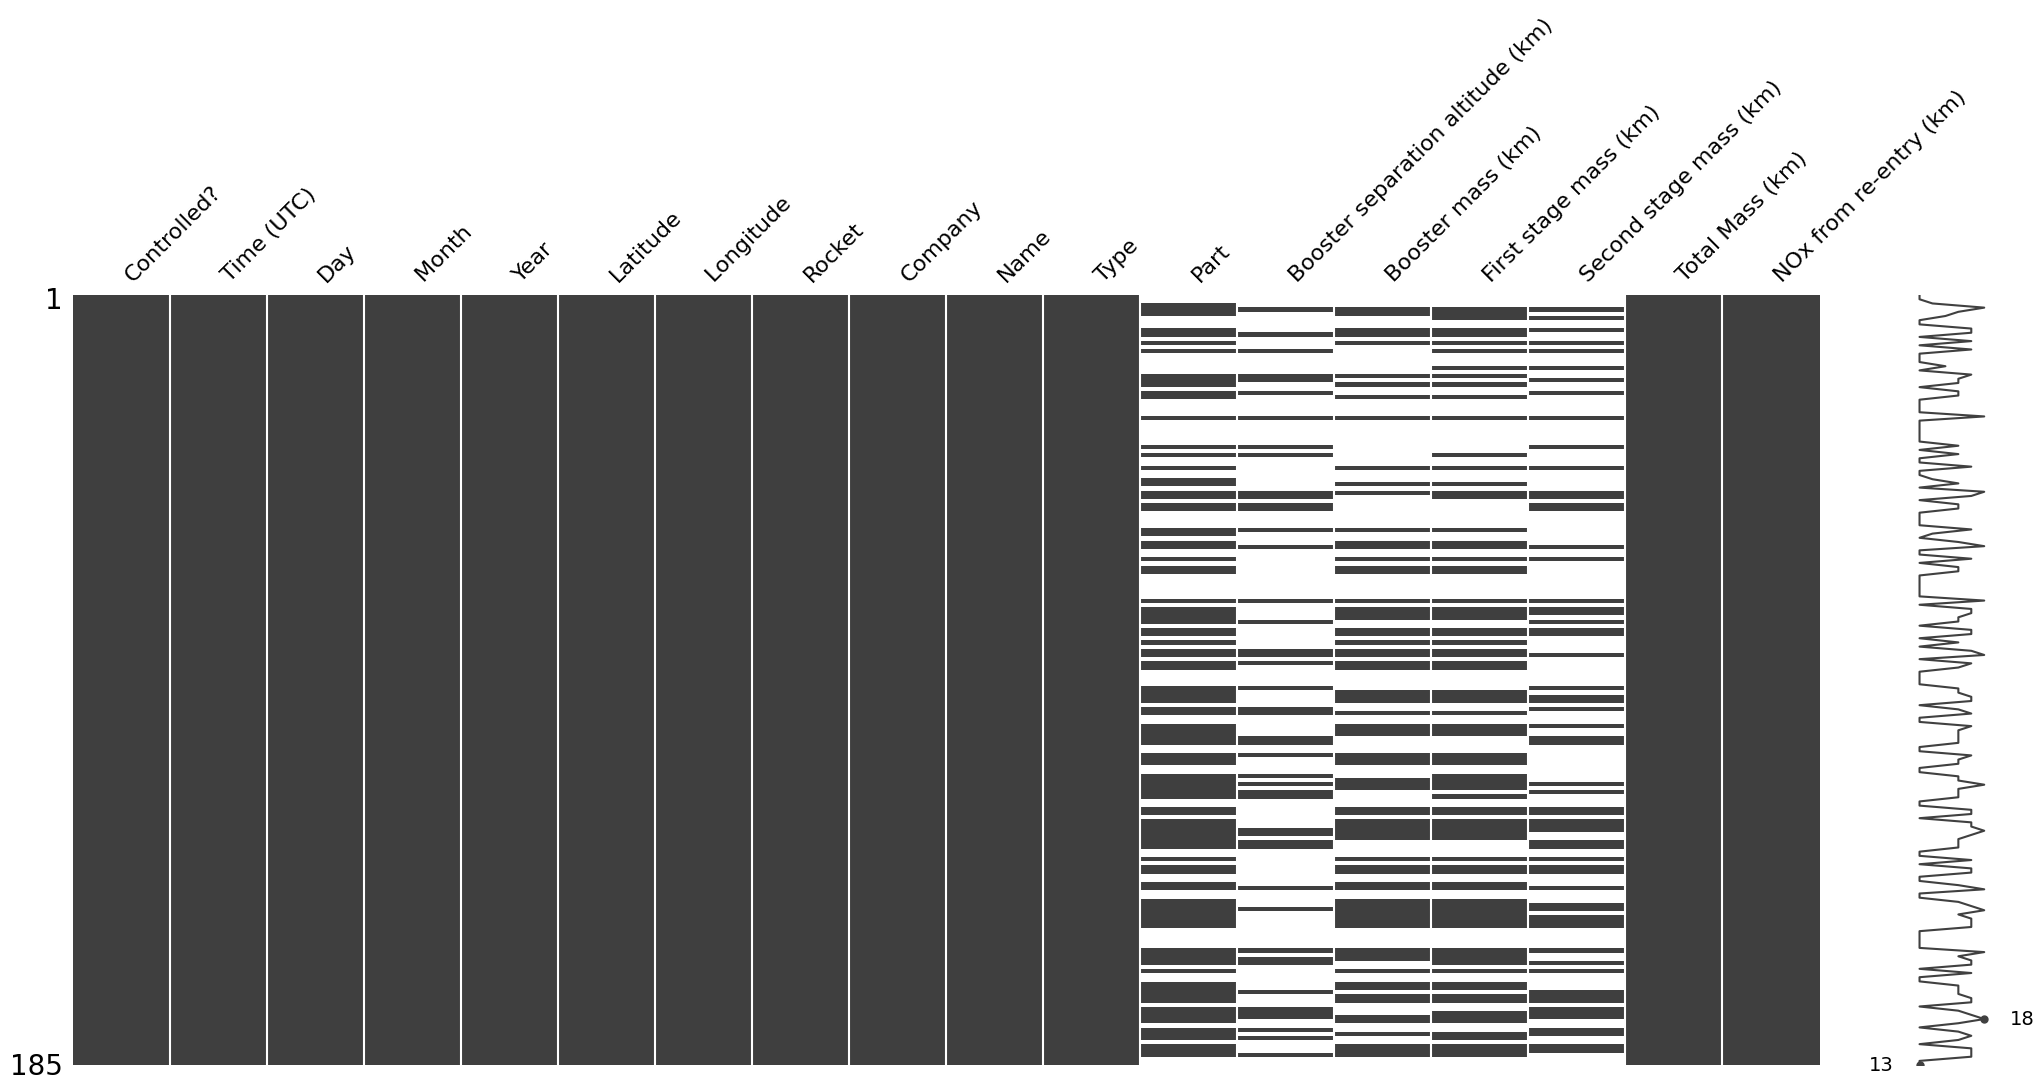

In [34]:
# Shows a matrix of NaN values for all the visual peoples
msno.matrix(reentries_df)

#We decided to keep all columns as we didn't know what we needed for our analysis and wanted to see a bigger picture. 

#### 2. df_space_decay

In [35]:
#Checking space_deacy.csv for NaN values
nan_values = df_space_decay.isna()
nan_values # pandas.core.frame.DataFrame

#DECAY_DATE column is empty - to be removed
#Columns not required for analysis  - CCSDS_OMM_VERS, COMMENT, CREATION_DATE, ORIGINATOR, FILE, GP_ID

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14367,False,False,False,False,False,True,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
14368,False,False,False,False,False,True,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
14369,False,False,False,False,False,True,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
14370,False,False,False,False,False,True,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False


In [36]:
# Drop the columns with all NaN values and modify original DF ('DECAY_DATE' column)  
df_space_decay = df_space_decay.dropna(axis=1, how='all')

# Drop unrequired columns:
df_space_decay = df_space_decay.drop(['COMMENT', 'CREATION_DATE', 'ORIGINATOR', 'FILE', 'GP_ID'], axis=1)

In [37]:
#Filled Launch date with the mean date
df_space_decay.LAUNCH_DATE = df_space_decay.LAUNCH_DATE.fillna('2004')

#Filled Country code with the string 'unknown'
df_space_decay.COUNTRY_CODE = df_space_decay.COUNTRY_CODE.fillna('unknown')

In [38]:
#Deleted rows with NA values as they are "To be assigned" and as such not valuable for our analyis
df_space_decay.isna()
df_space_decay.dropna(how='any', inplace=True)
df_space_decay.shape

(14174, 34)

In [39]:
#saved clean data to new CSV file in case we want to export for any reasons
df_space_decay.to_csv('space_decay_clean.csv', encoding='utf-8')
df_space_decay.to_csv("space_decay_clean.csv", index=False, encoding='utf-8')

#### 3. dflaunch (SpaceX API)

In [40]:
dflaunch.shape

(216, 17)

In [41]:
#Dropped rows where Rocket Name column was empty, modify origianl DF
dflaunch.dropna(subset=['RocketName'], inplace=True)

# keep gridfins, reused, legs?

dflaunch.isna()
#to delete landingpad, block, flights

# to fill or delete nan values 

,FlightNumber,Date,RocketName,PayloadMassKG,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
183,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
184,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
185,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


# ANALYSIS & VISUALISATION 
## Subquestion A: 
### How Do SpaceX Rocket Launches Compare Over Time in Terms of Environmental Impact?

In [42]:
all_launch_df.head()

,l,Day,Month,Year,Latitude,Longitude,Launch location,Rocket Type,Company,Booster fuel type,...,"Boosters mass (each, kg)","Boosters mass (total, kg)",Stage 1 mass (kg),Stage 2 mass (kg),Stage 3 mass (kg),Stage 4 mass (kg),Kerosene mass (kg),Hydrogen mass (kg),Hypergolic mass (kg),Solid fuel mass (kg)
0,17.083333,10.0,1.0,2019.0,28.246,102.027,Xichang,CZ-3B/G3,China Aerospace Science and Technology Corpora...,4 x Hypergolic,...,41100.0,164400.0,186200.0,32600.0,18200.0,0.0,0.0,18200.0,383200.0,0.0
1,15.516667,11.0,1.0,2019.0,34.632,-120.611,Vandenberg,Falcon-9 v1.2 (Block 5),SpaceX,NaN,...,0.0,0.0,418700.0,111500.0,0.0,0.0,530200.0,0.0,0.0,0.0
2,0.833333,18.0,1.0,2019.0,31.251,131.082,Kagoshima,Epsilon (2) CLPS,NASA,NaN,...,0.0,0.0,66000.0,15000.0,2500.0,145.0,0.0,0.0,145.0,83500.0
3,19.083333,19.0,1.0,2019.0,34.582,-120.626,Vandenberg,Delta-4H (upg.),United Launch Alliance (ULA),2 x Hydrogen,...,204000.0,408000.0,204000.0,27200.0,0.0,0.0,0.0,639200.0,0.0,0.0
4,5.700000,21.0,1.0,2019.0,40.961,100.298,Jiuquan,CZ-11,China Aerospace Science and Technology Corpora...,NaN,...,0.0,0.0,35000.0,10000.0,4050.0,220.0,0.0,0.0,0.0,49270.0


In [43]:
#Defining the emission factors for each fuel type (taken from the code from SubQ3)
kerosene_emission_factor = 3.1  # kg CO2 per kg of kerosene
hydrogen_emission_factor = 0.9  # kg CO2 per kg of hydrogen
hypergolic_emission_factor = 2.5  # kg CO2 per kg of hypergolic fuel
solid_fuel_emission_factor = 2.8  # kg CO2 per kg of solid fuel

In [44]:
#Calculating the total fuel emissions for each launch
all_launch_df['Total Fuel Emissions'] = (
    all_launch_df['Kerosene mass (kg)'] * kerosene_emission_factor +
    all_launch_df['Hydrogen mass (kg)'] * hydrogen_emission_factor +
    all_launch_df['Hypergolic mass (kg)'] * hypergolic_emission_factor +
    all_launch_df['Solid fuel mass (kg)'] * solid_fuel_emission_factor
)


In [45]:
# Reused Count by Rocket Type

reused_count_by_rocket = dflaunch.groupby('RocketName')['ReusedCount'].sum()
print(reused_count_by_rocket)

RocketName
Falcon 1          0
Falcon 9        955
Falcon Heavy      5
Name: ReusedCount, dtype: object


C:\Users\chhar\AppData\Local\Temp\ipykernel_16796\246255190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spacex_data.rename(columns={'Month ': 'Month'}, inplace=True)
C:\Users\chhar\AppData\Local\Temp\ipykernel_16796\246255190.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spacex_data['Date'] = pd.to_datetime(spacex_data[['Year', 'Month', 'Day']])
C:\Users\chhar\AppData\Local\Temp\ipykernel_16796\246255190.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

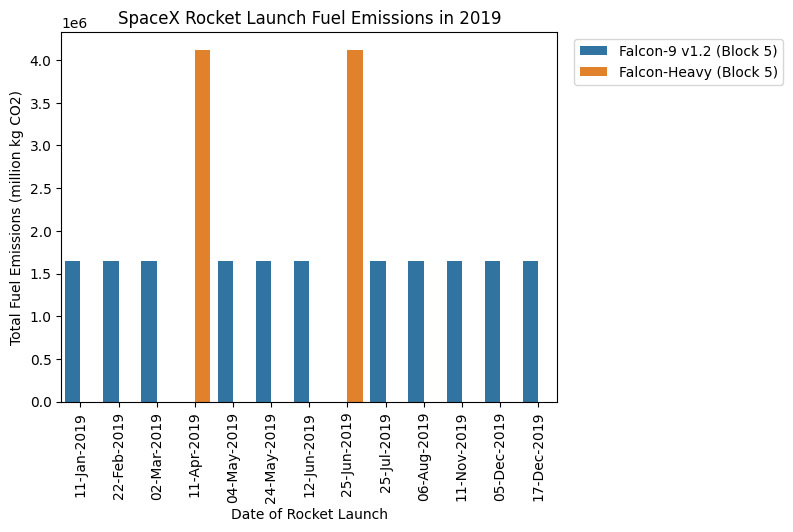

In [46]:
# Fuel Emissions from 2019 SpaceX Rocket Launches
spacex_data = all_launch_df[all_launch_df['Company'] == 'SpaceX']
spacex_data.rename(columns={'Month ': 'Month'}, inplace=True)
spacex_data['Date'] = pd.to_datetime(spacex_data[['Year', 'Month', 'Day']])
spacex_data.sort_values('Date', inplace=True)
sns.barplot(data=spacex_data, x='Date', y='Total Fuel Emissions', hue='Rocket Type')
plt.xlabel('Date of Rocket Launch')
plt.ylabel('Total Fuel Emissions (million kg CO2)')
plt.title('SpaceX Rocket Launch Fuel Emissions in 2019')
plt.xticks(rotation=90)
plt.gca().set_xticklabels(spacex_data['Date'].dt.strftime('%d-%b-%Y'))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

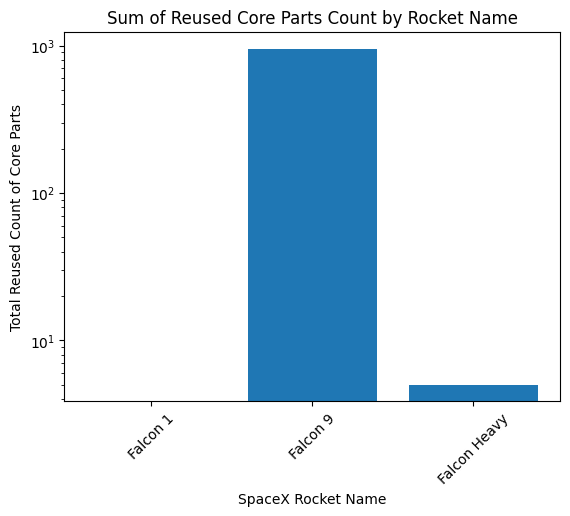

In [47]:
plt.bar(reused_count_by_rocket.index, reused_count_by_rocket.values)
plt.xlabel('SpaceX Rocket Name')
plt.ylabel('Total Reused Count of Core Parts')
plt.title('Sum of Reused Core Parts Count by Rocket Name')
plt.yscale('log')
plt.xticks(rotation=45)

plt.show()

C:\Users\chhar\AppData\Local\Temp\ipykernel_16796\937982274.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falcon9_data.sort_values('Date', inplace=True)


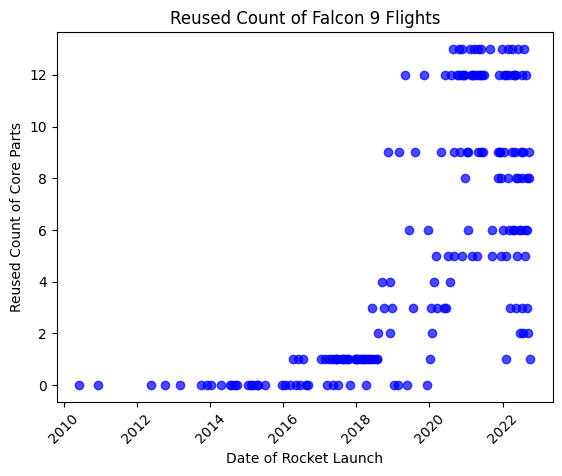

In [48]:
#Reused count of each Falcon 9 flight count over time 
falcon9_data = dflaunch[dflaunch['RocketName'] == 'Falcon 9']
falcon9_data.sort_values('Date', inplace=True)

plt.scatter(falcon9_data['Date'], falcon9_data['ReusedCount'], color='blue', alpha=0.7)
plt.xlabel('Date of Rocket Launch')
plt.ylabel('Reused Count of Core Parts')
plt.title('Reused Count of Falcon 9 Flights')
plt.xticks(rotation=45)

plt.show()

([0, 1, 2],
 [Text(0, 0, 'Falcon 1'), Text(1, 0, 'Falcon 9'), Text(2, 0, 'Falcon Heavy')])

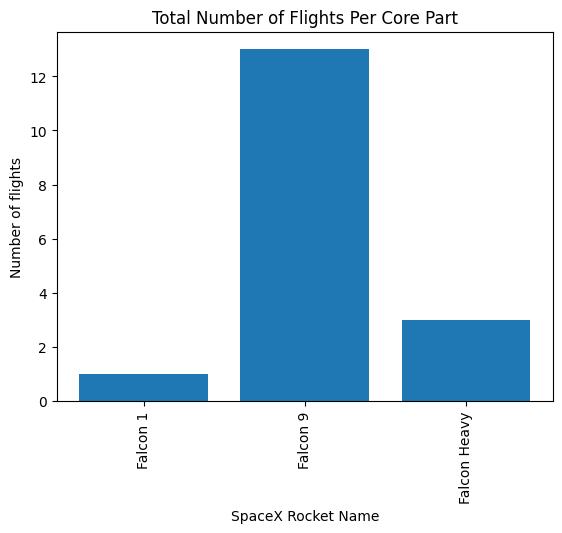

In [49]:
#Nos of flights done by Core Part

plt.bar(x=dflaunch['RocketName'], height=dflaunch['Flights'])
plt.xlabel('SpaceX Rocket Name')
plt.ylabel('Number of flights')
plt.title('Total Number of Flights Per Core Part')
plt.xticks(rotation=90)

In [50]:
all_launch_df.head()

,l,Day,Month,Year,Latitude,Longitude,Launch location,Rocket Type,Company,Booster fuel type,...,"Boosters mass (total, kg)",Stage 1 mass (kg),Stage 2 mass (kg),Stage 3 mass (kg),Stage 4 mass (kg),Kerosene mass (kg),Hydrogen mass (kg),Hypergolic mass (kg),Solid fuel mass (kg),Total Fuel Emissions
0,17.083333,10.0,1.0,2019.0,28.246,102.027,Xichang,CZ-3B/G3,China Aerospace Science and Technology Corpora...,4 x Hypergolic,...,164400.0,186200.0,32600.0,18200.0,0.0,0.0,18200.0,383200.0,0.0,974380.0
1,15.516667,11.0,1.0,2019.0,34.632,-120.611,Vandenberg,Falcon-9 v1.2 (Block 5),SpaceX,NaN,...,0.0,418700.0,111500.0,0.0,0.0,530200.0,0.0,0.0,0.0,1643620.0
2,0.833333,18.0,1.0,2019.0,31.251,131.082,Kagoshima,Epsilon (2) CLPS,NASA,NaN,...,0.0,66000.0,15000.0,2500.0,145.0,0.0,0.0,145.0,83500.0,234162.5
3,19.083333,19.0,1.0,2019.0,34.582,-120.626,Vandenberg,Delta-4H (upg.),United Launch Alliance (ULA),2 x Hydrogen,...,408000.0,204000.0,27200.0,0.0,0.0,0.0,639200.0,0.0,0.0,575280.0
4,5.700000,21.0,1.0,2019.0,40.961,100.298,Jiuquan,CZ-11,China Aerospace Science and Technology Corpora...,NaN,...,0.0,35000.0,10000.0,4050.0,220.0,0.0,0.0,0.0,49270.0,137956.0


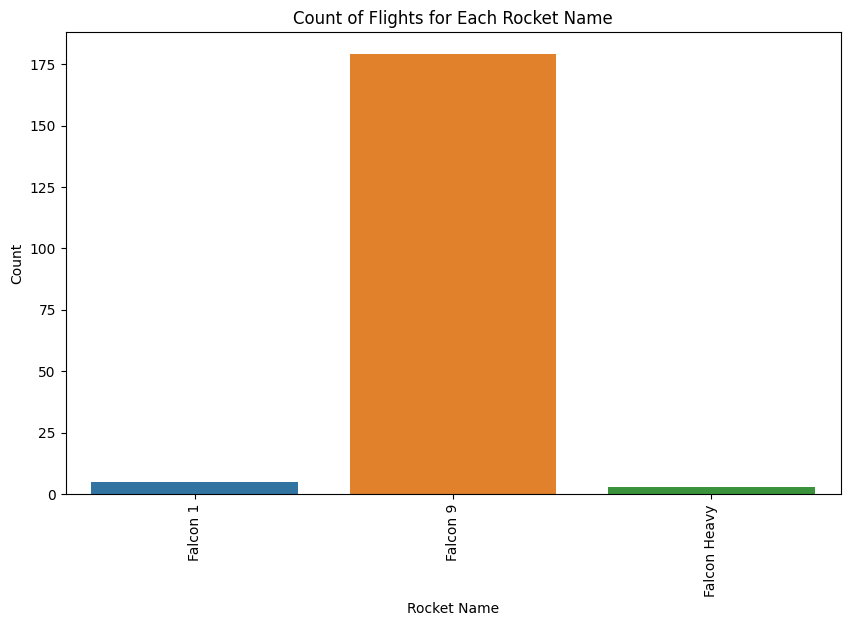

In [51]:
#Count of flights for each SpaceX Rocket
plt.figure(figsize=(10, 6))
sns.countplot(data=dflaunch, x='RocketName')
plt.xlabel('Rocket Name')
plt.ylabel('Count')
plt.title('Count of Flights for Each Rocket Name')
plt.xticks(rotation=90)
plt.show()

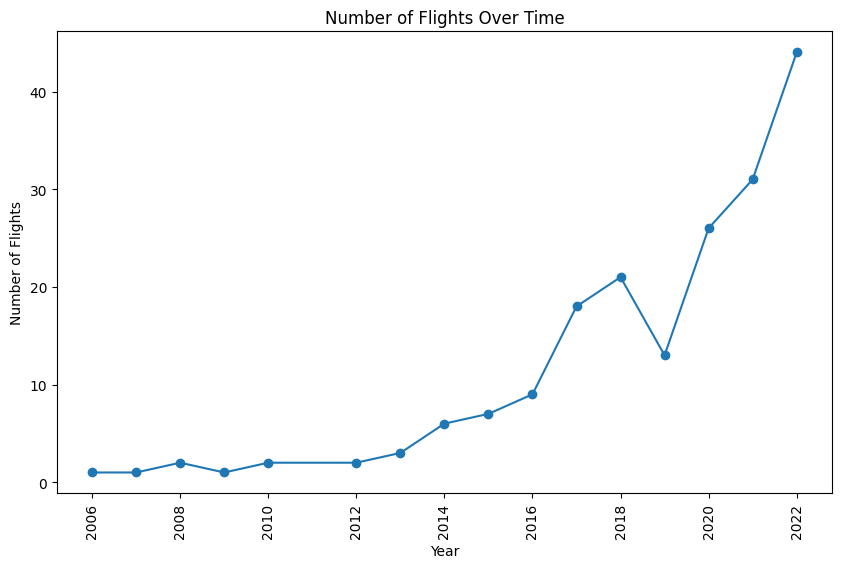

In [52]:
# Number of flights over time
plt.figure(figsize=(10, 6))
dflaunch['Date'] = pd.to_datetime(dflaunch['Date'])
dflaunch['Year'] = dflaunch['Date'].dt.year
flight_counts = dflaunch['Year'].value_counts().sort_index()
plt.plot(flight_counts.index, flight_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.title('Number of Flights Over Time')
plt.xticks(rotation=90)
plt.show()

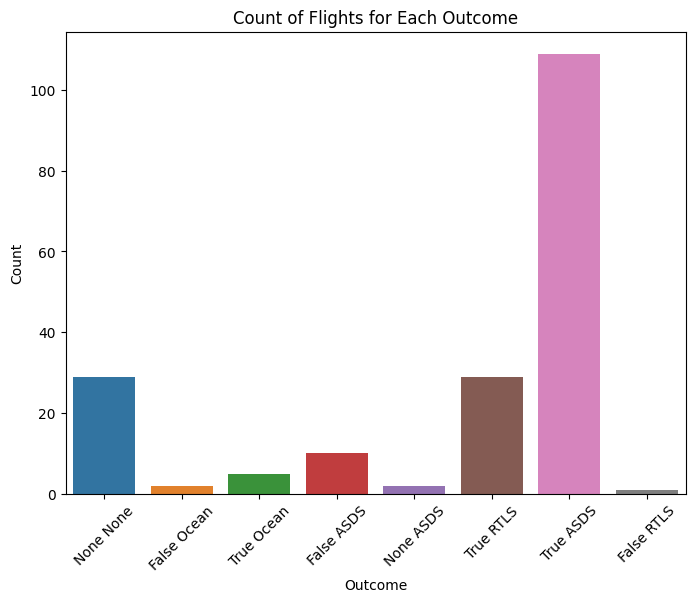

In [53]:
# Count of flights for each outcome
plt.figure(figsize=(8, 6))
sns.countplot(data=dflaunch, x='Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Count of Flights for Each Outcome')
plt.xticks(rotation=45)
plt.show()

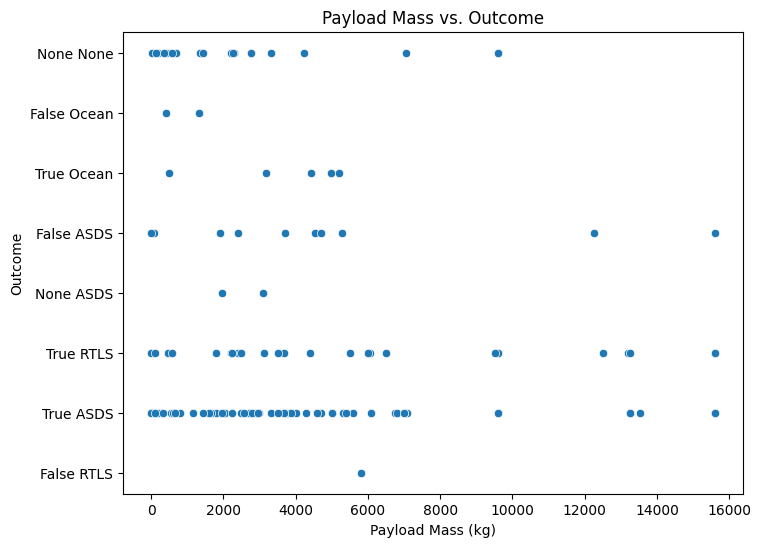

In [54]:
# Payload mass vs. Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dflaunch, x='PayloadMassKG', y='Outcome')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Outcome')
plt.title('Payload Mass vs. Outcome')
plt.show() 

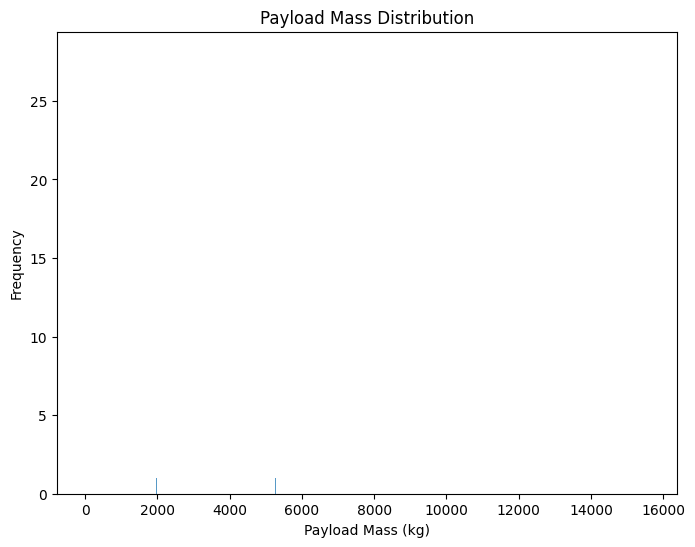

In [55]:
# Payload mass distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=dflaunch, x='PayloadMassKG', bins=10)
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Frequency')
plt.title('Payload Mass Distribution')
plt.show() 

## Subquestion B: 
### What is SpaceX's “Space Debris” Impact?

Using the cleaned data, we began by looking at a random sample of the space decay data frame. This gave us an insight into what the DF contained and what could be used to help answer the question. The sample helped to show that in order to find Space X's decay impact we first needed to establish which data belong to Space X rockets. Using the cleaned Space X API data, began looking at the head of the data frame to establish what could be used to help search through the decay data frame, which variables matched up with each other. The API data frame gave the Rocket Name and the date it was launched which could be used.

In [56]:
df_space_decay.sample(n=20)

,CCSDS_OMM_VERS,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,EPOCH,MEAN_MOTION,ECCENTRICITY,...,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,TLE_LINE0,TLE_LINE1,TLE_LINE2
2215,2,FENGYUN 1C DEB,1999-025BHR,EARTH,TEME,UTC,SGP4,2021-10-29T16:06:49.845600,14.261623,0.005784,...,846.134,763.045,DEBRIS,SMALL,PRC,1999.0,TSC,0 FENGYUN 1C DEB,1 31163U 99025BHR 21302.67141025 .00000534 0...,2 31163 99.0060 97.3767 0057840 289.2643 70...
6307,2,BKA 2,2012-039B,EARTH,TEME,UTC,SGP4,2021-11-01T03:27:38.358144,15.203094,0.000203,...,506.307,503.511,PAYLOAD,LARGE,BELA,2012.0,TTMTR,0 BKA 2,1 38708U 12039B 21305.14419396 .00000980 0...,2 38708 97.3461 205.8504 0002031 81.6365 56...
5335,2,MERIDIAN 3,2010-058A,EARTH,TEME,UTC,SGP4,2021-10-31T01:24:36.116640,2.006016,0.659915,...,37704.208,2653.511,PAYLOAD,LARGE,CIS,2010.0,PKMTR,0 MERIDIAN 3,1 37212U 10058A 21304.05875135 -.00000055 0...,2 37212 63.5139 249.1743 6599146 271.9251 139...
8819,2,NOAA 16 DEB,2000-055SA,EARTH,TEME,UTC,SGP4,2021-10-26T11:49:20.077536,14.080633,0.004660,...,899.766,832.252,DEBRIS,SMALL,US,2000.0,AFWTR,0 NOAA 16 DEB,1 42382U 00055SA 21299.49259349 .00001617 0...,2 42382 98.9304 14.3517 0046599 326.6834 33...
4793,2,DELTA 2 R/B,2009-071B,EARTH,TEME,UTC,SGP4,2021-10-29T12:24:13.948704,5.871885,0.344563,...,11071.970,2128.301,ROCKET BODY,LARGE,US,2009.0,AFWTR,0 DELTA 2 R/B,1 36120U 09071B 21302.51682811 .00000010 0...,2 36120 97.5092 237.6342 3445632 208.9149 126...
8139,2,NOAA 16 DEB,2000-055MD,EARTH,TEME,UTC,SGP4,2021-10-31T00:42:05.923008,14.179761,0.004423,...,864.100,800.316,DEBRIS,SMALL,US,2000.0,AFWTR,0 NOAA 16 DEB,1 41505U 00055MD 21304.02923522 .00001627 0...,2 41505 98.8308 32.8727 0044231 338.8036 21...
11937,2,STARLINK-1894,2020-074F,EARTH,TEME,UTC,SGP4,2021-10-31T14:37:50.704896,15.064066,0.000166,...,548.340,546.047,PAYLOAD,LARGE,US,2020.0,AFETR,0 STARLINK-1894,1 46744U 20074F 21304.60961464 .00002992 0...,2 46744 53.0526 259.7628 0001655 70.0470 290...
220,2,COSMOS 2392,2002-037A,EARTH,TEME,UTC,SGP4,2021-11-01T01:28:41.771712,12.067824,0.053287,...,2078.470,1222.807,PAYLOAD,LARGE,CIS,2002.0,TTMTR,0 COSMOS 2392,1 27470U 02037A 21305.06159458 -.00000284 0...,2 27470 63.4145 197.6903 0532873 353.7405 93...
9688,2,GALILEO 25 (2C1),2018-060A,EARTH,TEME,UTC,SGP4,2021-10-31T02:43:29.061120,1.704762,0.000441,...,23234.989,23208.881,PAYLOAD,LARGE,ESA,2018.0,FRGUI,0 GALILEO 25 (2C1),1 43564U 18060A 21304.11353080 -.00000074 0...,2 43564 57.0817 27.4044 0004410 253.6839 106...
3694,2,COSMOS 2251 DEB,1993-036KQ,EARTH,TEME,UTC,SGP4,2021-10-31T12:43:52.084416,14.513536,0.003119,...,743.378,699.088,DEBRIS,SMALL,CIS,1993.0,PKMTR,0 COSMOS 2251 DEB,1 34119U 93036KQ 21304.53046394 .00005071 0...,2 34119 74.0451 78.3914 0031193 103.7965 17...


In [57]:
dflaunch.head()

,FlightNumber,Date,RocketName,PayloadMassKG,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Year
0,1,2006-03-24,Falcon 1,20,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin1A,167.743129,9.047721,2006
1,2,2007-03-21,Falcon 1,None,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin2A,167.743129,9.047721,2007
2,3,2008-08-03,Falcon 1,None,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin1C,167.743129,9.047721,2008
3,4,2008-09-28,Falcon 1,None,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin2C,167.743129,9.047721,2008
4,5,2009-07-13,Falcon 1,165,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin3C,167.743129,9.047721,2009


In [58]:
dflaunch['RocketName'].unique()

array(['Falcon 1', 'Falcon 9', 'Falcon Heavy'], dtype=object)

Using the Space Decay data frame and the unique values retrieved from the API to determine which values belonged to Space X. Each unique value from the API contained the string 'Falcon' so this was used to search through on the object name.

In [59]:
spacex_debris = df_space_decay[(df_space_decay['OBJECT_NAME'].str.contains('FALCON'))]
spacex_debris

,CCSDS_OMM_VERS,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,EPOCH,MEAN_MOTION,ECCENTRICITY,...,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,TLE_LINE0,TLE_LINE1,TLE_LINE2
1933,2,FALCONSAT 3,2007-006E,EARTH,TEME,UTC,SGP4,2021-11-01T03:28:53.743872,15.426129,0.000100,...,439.084,437.722,PAYLOAD,MEDIUM,US,2007.0,AFETR,0 FALCONSAT 3,1 30776U 07006E 21305.14506648 .00016756 0...,2 30776 35.4342 300.7307 0000999 107.8943 252...
3257,2,DEMOSAT/FALCON 1,2008-048A,EARTH,TEME,UTC,SGP4,2021-11-01T02:44:38.825664,14.850741,0.001306,...,622.483,604.228,PAYLOAD,LARGE,US,2008.0,KWAJL,0 DEMOSAT/FALCON 1,1 33393U 08048A 21305.11433826 .00001391 0...,2 33393 9.3452 139.6044 0013055 193.6918 166...
4485,2,FALCON 1 R/B,2009-037B,EARTH,TEME,UTC,SGP4,2021-10-31T14:25:02.071488,14.782830,0.004636,...,667.266,602.237,ROCKET BODY,LARGE,US,2009.0,KWAJL,0 FALCON 1 R/B,1 35579U 09037B 21304.60071842 .00001368 0...,2 35579 9.0464 330.5891 0046364 201.9694 157...
5350,2,FALCON 9 R/B,2010-066K,EARTH,TEME,UTC,SGP4,2021-10-31T20:00:23.444352,6.996971,0.423221,...,10055.525,281.813,ROCKET BODY,LARGE,US,2010.0,AFETR,0 FALCON 9 R/B,1 37253U 10066K 21304.83360468 .00011662 0...,2 37253 34.5030 102.1095 4232215 100.7941 308...
6607,2,CUSAT 2/FALCON 9,2013-055G,EARTH,TEME,UTC,SGP4,2021-11-01T02:54:32.612256,14.553651,0.055953,...,1104.685,311.678,PAYLOAD,LARGE,US,2013.0,AFWTR,0 CUSAT 2/FALCON 9,1 39271U 13055G 21305.12121079 .00016538 0...,2 39271 80.9615 84.7344 0559534 94.3354 272...
7155,2,FALCON 9 R/B,2014-046B,EARTH,TEME,UTC,SGP4,2021-10-31T22:53:33.476352,4.081199,0.602027,...,20119.862,204.462,ROCKET BODY,LARGE,US,2014.0,AFETR,0 FALCON 9 R/B,1 40108U 14046B 21304.95385968 .00032227 0...,2 40108 24.1378 112.6963 6020267 49.5097 349...
7360,2,FALCON 9 R/B,2015-010C,EARTH,TEME,UTC,SGP4,2021-10-31T17:05:09.156192,1.187472,0.820362,...,62193.403,388.697,ROCKET BODY,LARGE,US,2015.0,AFETR,0 FALCON 9 R/B,1 40426U 15010C 21304.71191153 -.00000098 0...,2 40426 25.5773 335.7701 8203616 182.2859 166...
7503,2,FALCON 9 R/B,2015-023B,EARTH,TEME,UTC,SGP4,2021-10-31T08:44:20.481216,3.173254,0.663182,...,26155.932,210.481,ROCKET BODY,LARGE,US,2015.0,AFETR,0 FALCON 9 R/B,1 40618U 15023B 21304.36412594 .00013025 0...,2 40618 25.4033 333.8058 6631818 317.9137 6...
8061,2,FALCON 9 R/B,2016-013B,EARTH,TEME,UTC,SGP4,2021-10-31T16:00:59.306976,1.997514,0.749392,...,40212.177,296.142,ROCKET BODY,LARGE,US,2016.0,AFETR,0 FALCON 9 R/B,1 41381U 16013B 21304.66735309 .00002374 0...,2 41381 27.6613 64.0316 7493916 155.6234 276...
8201,2,FALCON 9 R/B,2016-038C,EARTH,TEME,UTC,SGP4,2021-10-31T21:27:28.665792,1.183700,0.817624,...,62235.656,506.407,ROCKET BODY,LARGE,US,2016.0,AFETR,0 FALCON 9 R/B,1 41590U 16038C 21304.89408178 -.00000378 0...,2 41590 23.8822 316.9366 8176240 53.7927 356...


In [60]:
df_unique_name = spacex_debris['OBJECT_NAME'].unique()
df_unique_name

array(['FALCONSAT 3', 'DEMOSAT/FALCON 1', 'FALCON 1 R/B', 'FALCON 9 R/B',
       'CUSAT 2/FALCON 9', 'FALCONSAT-6', 'FALCON 9 DEB',
       'FALCON HEAVY R/B', 'FALCON EYE 2'], dtype=object)

From the list of unique values for 'Object name', check the unique list of names containing 'falcon', as this may contain objects belonging to other organizations

FALCONSAT 3, DEMOSAT/FALCON 1, FALCONSAT-6, beong to United States Air Force Academy (USAFA)

CUSAT 2/FALCON 9 belongs to Cornell University

FALCON EYE 2 belongs to United Arab Emirates (UAE)

In [61]:
spacex_debris_data = df_space_decay[(df_space_decay['OBJECT_NAME'].str.contains('FALCON 1 R/B'))
                                    |(df_space_decay['OBJECT_NAME'].str.contains('FALCON 9 R/B'))
                                      |(df_space_decay['OBJECT_NAME'].str.contains('FALCON 9 DEB'))
                                        |(df_space_decay['OBJECT_NAME'].str.contains('FALCON HEAVY R/B'))]
spacex_debris_data

,CCSDS_OMM_VERS,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,EPOCH,MEAN_MOTION,ECCENTRICITY,...,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,TLE_LINE0,TLE_LINE1,TLE_LINE2
4485,2,FALCON 1 R/B,2009-037B,EARTH,TEME,UTC,SGP4,2021-10-31T14:25:02.071488,14.782830,0.004636,...,667.266,602.237,ROCKET BODY,LARGE,US,2009.0,KWAJL,0 FALCON 1 R/B,1 35579U 09037B 21304.60071842 .00001368 0...,2 35579 9.0464 330.5891 0046364 201.9694 157...
5350,2,FALCON 9 R/B,2010-066K,EARTH,TEME,UTC,SGP4,2021-10-31T20:00:23.444352,6.996971,0.423221,...,10055.525,281.813,ROCKET BODY,LARGE,US,2010.0,AFETR,0 FALCON 9 R/B,1 37253U 10066K 21304.83360468 .00011662 0...,2 37253 34.5030 102.1095 4232215 100.7941 308...
7155,2,FALCON 9 R/B,2014-046B,EARTH,TEME,UTC,SGP4,2021-10-31T22:53:33.476352,4.081199,0.602027,...,20119.862,204.462,ROCKET BODY,LARGE,US,2014.0,AFETR,0 FALCON 9 R/B,1 40108U 14046B 21304.95385968 .00032227 0...,2 40108 24.1378 112.6963 6020267 49.5097 349...
7360,2,FALCON 9 R/B,2015-010C,EARTH,TEME,UTC,SGP4,2021-10-31T17:05:09.156192,1.187472,0.820362,...,62193.403,388.697,ROCKET BODY,LARGE,US,2015.0,AFETR,0 FALCON 9 R/B,1 40426U 15010C 21304.71191153 -.00000098 0...,2 40426 25.5773 335.7701 8203616 182.2859 166...
7503,2,FALCON 9 R/B,2015-023B,EARTH,TEME,UTC,SGP4,2021-10-31T08:44:20.481216,3.173254,0.663182,...,26155.932,210.481,ROCKET BODY,LARGE,US,2015.0,AFETR,0 FALCON 9 R/B,1 40618U 15023B 21304.36412594 .00013025 0...,2 40618 25.4033 333.8058 6631818 317.9137 6...
8061,2,FALCON 9 R/B,2016-013B,EARTH,TEME,UTC,SGP4,2021-10-31T16:00:59.306976,1.997514,0.749392,...,40212.177,296.142,ROCKET BODY,LARGE,US,2016.0,AFETR,0 FALCON 9 R/B,1 41381U 16013B 21304.66735309 .00002374 0...,2 41381 27.6613 64.0316 7493916 155.6234 276...
8201,2,FALCON 9 R/B,2016-038C,EARTH,TEME,UTC,SGP4,2021-10-31T21:27:28.665792,1.183700,0.817624,...,62235.656,506.407,ROCKET BODY,LARGE,US,2016.0,AFETR,0 FALCON 9 R/B,1 41590U 16038C 21304.89408178 -.00000378 0...,2 41590 23.8822 316.9366 8176240 53.7927 356...
8536,2,FALCON 9 R/B,2017-014B,EARTH,TEME,UTC,SGP4,2021-10-31T08:31:57.578592,7.945076,0.386455,...,8330.610,130.893,ROCKET BODY,LARGE,US,2017.0,AFETR,0 FALCON 9 R/B,1 42071U 17014B 21304.35552753 .01574385 -5...,2 42071 22.3136 35.6318 3864551 34.0413 345...
8870,2,FALCON 9 R/B,2017-017B,EARTH,TEME,UTC,SGP4,2021-10-30T11:37:53.474880,2.605901,0.703146,...,31612.950,243.619,ROCKET BODY,LARGE,US,2017.0,AFETR,0 FALCON 9 R/B,1 42433U 17017B 21303.48464670 .00004006 0...,2 42433 26.2730 0.8179 7031458 303.6017 8...
9078,2,FALCON 9 R/B,2017-025B,EARTH,TEME,UTC,SGP4,2021-10-31T19:37:01.027200,1.029372,0.837891,...,69772.441,338.650,ROCKET BODY,LARGE,US,2017.0,AFETR,0 FALCON 9 R/B,1 42699U 17025B 21304.81737300 .00000232 0...,2 42699 19.4123 161.4956 8378907 250.1762 11...


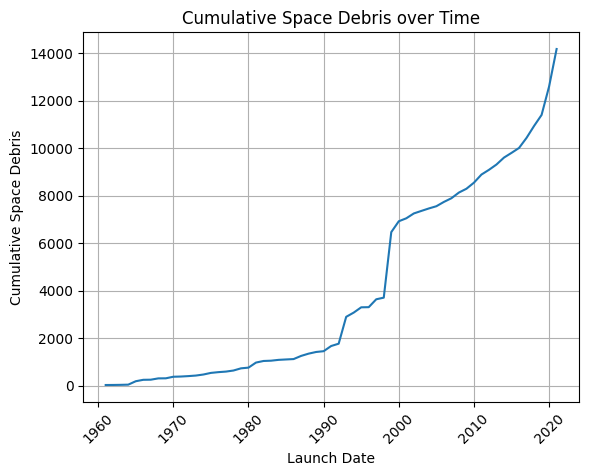

In [62]:
df_space_decay = df_space_decay.sort_values('LAUNCH_DATE')
cumulative_space_objects = df_space_decay['LAUNCH_DATE'].value_counts().sort_index().cumsum()

plt.plot(cumulative_space_objects.index, cumulative_space_objects.values)

plt.xlabel('Launch Date')
plt.ylabel('Cumulative Space Debris')
plt.title('Cumulative Space Debris over Time')
plt.xticks(rotation=45)
plt.grid()

This line graph shows the amount of Space Debris created over time by all companies within the space decay data frame. It shows that until the early 1990's, a time period of 30years, there was a fairly stable and slow accumilation of space debris, from 0 to 2000 objects. Then after this period there is an exponential increase from 2000 objects to over 14,000 objects in a space of 30 years, an increase of 600%.

**Next, in order to learn about Space X's decay impact, we must understand what the different pieces of space debris is and what they mean.**

In [63]:
df_space_decay['OBJECT_TYPE'].unique()

array(['DEBRIS', 'ROCKET BODY', 'PAYLOAD', 'TBA'], dtype=object)

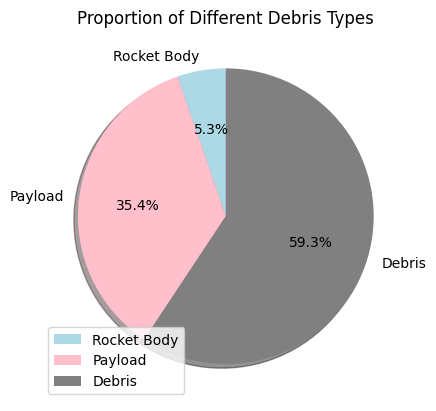

In [64]:
rocket_body_count = (df_space_decay['OBJECT_TYPE'] == 'ROCKET BODY').sum()
payload_count = (df_space_decay['OBJECT_TYPE'] == 'PAYLOAD').sum()
debris_count = (df_space_decay['OBJECT_TYPE'] == 'DEBRIS').sum()

slices= [rocket_body_count, payload_count, debris_count]

color_list = ['hotpink', 'green', 'grey']

labels_list = ['Rocket Body', 'Payload', 'Debris']
color_list = ['lightblue', 'pink', 'grey']

plt.pie(
    slices,
    labels=labels_list,
    colors=color_list,
    startangle=90,
    shadow= True,
    autopct='%1.1f%%'
)
plt.title('Proportion of Different Debris Types')
plt.legend(loc="lower left")

This pie chart depicts the proptions of the different types of space debris. it shows that the majority, 59.3%, is unwanted debris with 35.4% consisting of known payloads such as satilites and only 5.3% as know and factored in rocket parts which will be entered.

In [65]:
#Using the Space X API to estabish when the first Space X rocket was launched.
dflaunch['Date'].min()

Timestamp('2006-03-24 00:00:00')

#### How much debris has Space X has accumulated compared to other companies?


In [66]:
#selecting a random sample of companies for comparison
all_launch_df['Company'].sample(3)

81    China Aerospace Science and Technology Corpora...
86    China Aerospace Science and Technology Corpora...
4     China Aerospace Science and Technology Corpora...
Name: Company, dtype: object

In [67]:
#NASA rockets
nasa_rockets = all_launch_df.loc[(all_launch_df['Company'] == 'NASA'), 'Rocket Type']
nasa_debris = df_space_decay.loc[(df_space_decay.LAUNCH_DATE >= 2006.0) & (df_space_decay['OBJECT_NAME'].str.contains('EPSILON')), 'RCS_SIZE'].count()
nasa_debris

5

In [68]:
# CASC_rockets
CASC_rockets = all_launch_df.loc[(all_launch_df['Company'].str.contains('CASC')), 'Rocket Type']
CASC_debris = df_space_decay.loc[(df_space_decay.LAUNCH_DATE >= 2006.0) & (df_space_decay['OBJECT_NAME'].str.contains('CZ')) | (df_space_decay['OBJECT_NAME'].str.contains('KUAIZHOU')), 'RCS_SIZE'].count()
CASC_debris


531

In [69]:
# ULA_rockets
ULA_rockets = all_launch_df.loc[(all_launch_df['Company'].str.contains('ULA')), 'Rocket Type']
ULA_debris = df_space_decay.loc[(df_space_decay.LAUNCH_DATE >= 2006.0) & (df_space_decay['OBJECT_NAME'].str.contains('DELTA')) | (df_space_decay['OBJECT_NAME'].str.contains('ATLAS')), 'RCS_SIZE'].count()
ULA_debris


127

In [70]:
spacex_debris_count = df_space_decay.loc[(df_space_decay['OBJECT_NAME'].str.contains('FALCON 1 R/B'))
                                    |(df_space_decay['OBJECT_NAME'].str.contains('FALCON 9 R/B'))
                                      |(df_space_decay['OBJECT_NAME'].str.contains('FALCON 9 DEB'))
                                        |(df_space_decay['OBJECT_NAME'].str.contains('FALCON HEAVY R/B')), 'RCS_SIZE'].count()
spacex_debris_count

37

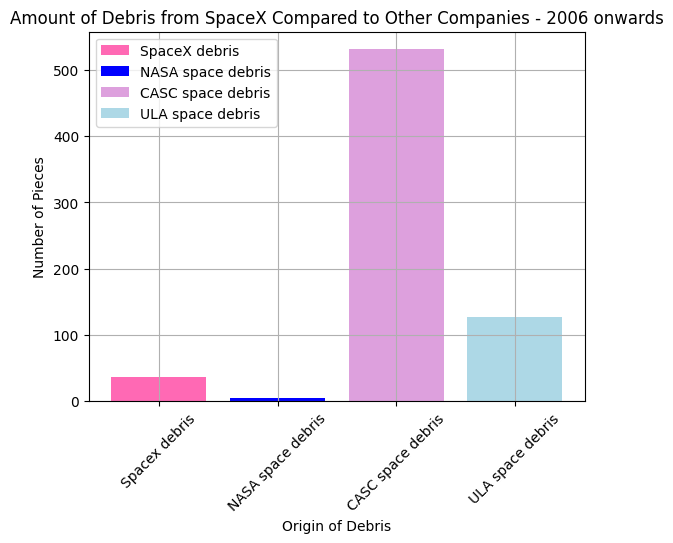

In [71]:
plt.bar([0],[spacex_debris_count],
label="SpaceX debris", color='hotpink',width=.2)

plt.bar([0.25],[nasa_debris],
label="NASA space debris", color='blue',width=.2)

plt.bar([0.5],[CASC_debris],
label="CASC space debris", color='plum',width=.2)

plt.bar([0.75],[ULA_debris],
label="ULA space debris", color='lightblue',width=.2)

LABLES = ['Spacex debris', 'NASA space debris', 'CASC space debris', 'ULA space debris']
spaces = [0, 0.25, 0.5, 0.75]

plt.legend()
plt.xlabel('Origin of Debris')
plt.ylabel('Number of Pieces')
plt.xticks(spaces, LABLES, rotation = 45)
plt.title('Amount of Debris from SpaceX Compared to Other Companies - 2006 onwards')

plt.grid()

This graph shows Space X's impact on the amount of pieces of space debris compared to randomly selected companies, Nasa, CASC and ULA. The graph shows that in comparision to CASC and ULA, Space X has made a very minimal contribution since its establishment in 2006 but still more than its American counterpart NASA. Space X has accumpulated around 40 pieces of debris compared to CASC's 650 and ULA's 480. However, this is still around 500% more than NASA's 5.

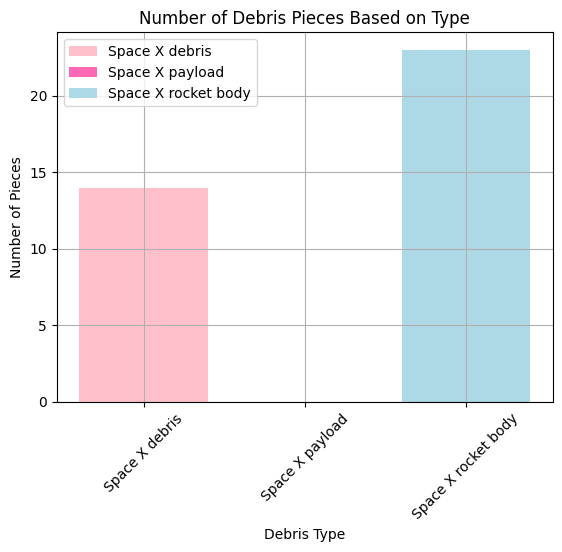

In [72]:
spacex_debris = df_space_decay.loc[((df_space_decay['OBJECT_NAME'].str.contains('FALCON 1 R/B'))
                                    |(df_space_decay['OBJECT_NAME'].str.contains('FALCON 9 R/B'))
                                      |(df_space_decay['OBJECT_NAME'].str.contains('FALCON 9 DEB'))
                                        |(df_space_decay['OBJECT_NAME'].str.contains('FALCON HEAVY R/B'))) 
                   & (df_space_decay['OBJECT_TYPE'] == 'DEBRIS'), 'RCS_SIZE'].count()
spacex_payload = df_space_decay.loc[((df_space_decay['OBJECT_NAME'].str.contains('FALCON 1 R/B'))
                                    |(df_space_decay['OBJECT_NAME'].str.contains('FALCON 9 R/B'))
                                      |(df_space_decay['OBJECT_NAME'].str.contains('FALCON 9 DEB'))
                                        |(df_space_decay['OBJECT_NAME'].str.contains('FALCON HEAVY R/B'))) 
                   & (df_space_decay['OBJECT_TYPE'] == 'PAYLOAD'), 'RCS_SIZE'].count()
spacex_rocketbody = df_space_decay.loc[((df_space_decay['OBJECT_NAME'].str.contains('FALCON 1 R/B'))
                                    |(df_space_decay['OBJECT_NAME'].str.contains('FALCON 9 R/B'))
                                      |(df_space_decay['OBJECT_NAME'].str.contains('FALCON 9 DEB'))
                                        |(df_space_decay['OBJECT_NAME'].str.contains('FALCON HEAVY R/B'))) 
                   & (df_space_decay['OBJECT_TYPE'] == 'ROCKET BODY'), 'RCS_SIZE'].count()

plt.bar([0],[spacex_debris],
label="Space X debris", color='pink',width=.2)

plt.bar([0.25],[spacex_payload],
label="Space X payload", color='hotpink',width=.2)

plt.bar([0.5],[spacex_rocketbody],
label="Space X rocket body", color='lightblue',width=.2)


LABLES = ['Space X debris', 'Space X payload', 'Space X rocket body']
spaces = [0, 0.25, 0.5]

plt.legend()
plt.xlabel('Debris Type')
plt.ylabel('Number of Pieces')
plt.xticks(spaces, LABLES, rotation = 45)
plt.title('Number of Debris Pieces Based on Type')

plt.grid()

This bar graph depicts the accumilation of Space X's debris based on its type. Although Space X has not accumulated much compared to ther companies, this graph shows that a considerable amount of it, around 14 pieces is unwanted decaying debris. This debris cannot be reused or taken away and must be left for it to reenter the asmospher or decay on its own. This is comapred to the rockey bodies, with a count of around 24. These are known pieces, intentionally put there and can be called back by Space X in a hope of being reused. Finally there are zero payload peices which are usually satilites.

As Space X continues to develop it is obvious from the data they are learn from each launch and other companies around them. This is shown through the fact that, although the have created debris, they have made very little is comparision to many of their counterparts. Elon Musk talks a lot in the media about how he is trying to create a company which works alongside the environment and reuse what they create to stop the abundent amount of waste. This is shown in the data as, especially compared to ULA and CASC, Space X has very little debris in the Earth's atmosphere.

In [73]:
df_space_decay.head()

,CCSDS_OMM_VERS,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,EPOCH,MEAN_MOTION,ECCENTRICITY,...,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,TLE_LINE0,TLE_LINE1,TLE_LINE2
13823,2,THOR ABLESTAR DEB,1961-015MT,EARTH,TEME,UTC,SGP4,2021-10-30T02:13:02.296416,14.295049,0.003953,...,821.739,765.038,DEBRIS,SMALL,US,1961.0,AFETR,0 THOR ABLESTAR DEB,1 48815U 61015MT 21303.09238769 .00003359 0...,2 48815 65.8151 111.3248 0039532 262.2251 97...
13834,2,THOR ABLESTAR DEB,1961-015NE,EARTH,TEME,UTC,SGP4,2021-10-31T21:41:01.230144,14.262516,0.004730,...,838.265,770.314,DEBRIS,SMALL,US,1961.0,AFETR,0 THOR ABLESTAR DEB,1 48826U 61015NE 21304.90348646 .00000558 0...,2 48826 66.5975 113.6490 0047304 97.3332 337...
13833,2,THOR ABLESTAR DEB,1961-015ND,EARTH,TEME,UTC,SGP4,2021-10-30T06:12:52.890336,14.232272,0.004997,...,850.403,778.519,DEBRIS,SMALL,US,1961.0,AFETR,0 THOR ABLESTAR DEB,1 48825U 61015ND 21303.25894549 .00003942 0...,2 48825 65.7956 235.6842 0049971 307.6394 52...
13832,2,THOR ABLESTAR DEB,1961-015NC,EARTH,TEME,UTC,SGP4,2021-10-31T20:02:10.451616,14.017006,0.008843,...,952.171,823.658,DEBRIS,SMALL,US,1961.0,AFETR,0 THOR ABLESTAR DEB,1 48824U 61015NC 21304.83484319 .00000045 0...,2 48824 67.0025 148.7004 0088434 114.8042 246...
13830,2,THOR ABLESTAR DEB,1961-015NA,EARTH,TEME,UTC,SGP4,2021-10-31T06:19:27.558624,14.049640,0.011344,...,958.954,794.362,DEBRIS,SMALL,US,1961.0,AFETR,0 THOR ABLESTAR DEB,1 48822U 61015NA 21304.26351341 .00000084 0...,2 48822 66.7162 288.0083 0113437 132.3536 228...


## Subquestion C: 
### How Do SpaceX Launches Compare with Other Countries/Locations and/or Companies in Terms of Environmental Impact? E.g. Fuel Emissions, fuel types

### Emission factors for each fuel type:

These emission factors provide a standardised measure to estimate the amount of carbon dioxide emissions associated with different types of rocket fuels. They will help us to assess the environmental impact of rocket launches and help us to understand the how emissions are impacting the carbon footprint of space exploration. 



- **kerosene_emission_factor = 3.1  # kg CO2 per kg of kerosene**
    *The kerosene emission factor refers to the amount of carbon dioxide (CO2) produced when burning one kilogram of kerosene as a fuel for the rocket. It quantifies the greenhouse gas emissions associated with the combustion of kerosene during the rocket launch.*
- **hydrogen_emission_factor = 0.9  # kg CO2 per kg of hydrogen**
    *The hydrogen emission factor represents the quantity of carbon dioxide (CO2) released when one kilogram of hydrogen is burned as fuel for the rocket. It indicates the level of greenhouse gas emissions resulting from the combustion process using hydrogen as a propellant.*
- **hypergolic_emission_factor = 2.5  # kg CO2 per kg of hypergolic fuel**
    *The hypergolic emission factor signifies the amount of carbon dioxide (CO2) generated when one kilogram of hypergolic fuel is burned in the rocket's engines. It denotes the emissions associated with the combustion of hypergolic fuels, which are a type of propellant that ignites spontaneously when they come into contact with each other.*
- **solid_fuel_emission_factor = 2.8  # kg CO2 per kg of solid fuel**
    *The solid fuel emission factor represents the quantity of carbon dioxide (CO2) produced when one kilogram of solid fuel is burned as propellant in the rocket. It indicates the level of greenhouse gas emissions resulting from the combustion of solid fuels, which are typically used in rocket motors for their high energy content.*

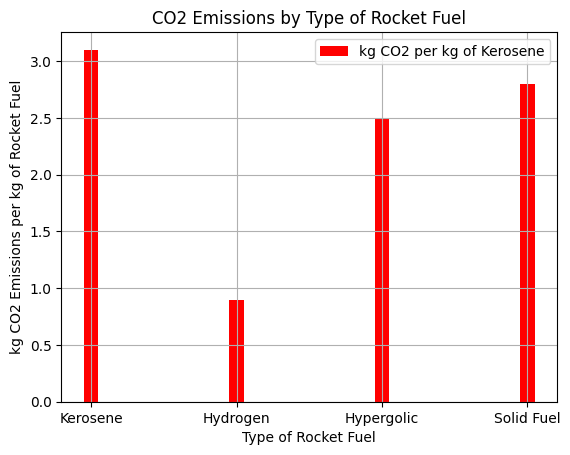

In [74]:
fuel_types = ['Kerosene', 'Hydrogen', 'Hypergolic', 'Solid Fuel']
emission_factors = [kerosene_emission_factor, hydrogen_emission_factor, hypergolic_emission_factor, solid_fuel_emission_factor]


plt.bar(fuel_types, emission_factors,label='kg CO2 per kg of Kerosene', color='red', width=.1 )

#plt.bar(kerosene_emission_factor, height=kerosene_emission_factor, label='kg CO2 per kg of Kerosene', color='hotpink', width=.3)

plt.legend()
plt.xlabel("Type of Rocket Fuel")
plt.ylabel("kg CO2 Emissions per kg of Rocket Fuel")
plt.title("CO2 Emissions by Type of Rocket Fuel")
plt.grid()


plt.show()

In [75]:
# Group the launches by Rocket Type and calculate the total fuel emissions for each type
fuel_type_emissions = all_launch_df.groupby('Rocket Type')['Total Fuel Emissions'].sum()
fuel_type_emissions

Rocket Type
Antares-230                       817960.0
Antares-230+                      817960.0
Ariane-5ECA                      4544730.0
Ariane-5ECA+                     1515234.0
Atlas-5(551)                     1496219.0
Atlas-5(N22)                     1138127.0
CZ-11                             275912.0
CZ-11H                            137956.0
CZ-2C (3)                         445000.0
CZ-2D (2)                         546875.0
CZ-3B/G2                          974380.0
CZ-3B/G3                         6820660.0
CZ-3B/G3Z                        2923140.0
CZ-3C/G2                          768880.0
CZ-4B                            2327500.0
CZ-4C                            1745625.0
CZ-5                             2047610.0
CZ-6                              291958.0
Delta-4H (upg.)                   575280.0
Delta-4M+(4,2) (upg.)             368289.0
Delta-4M+(5,4) (upg.)             540720.0
Electron KS                       210180.0
Epsilon (2) CLPS                  234162.5

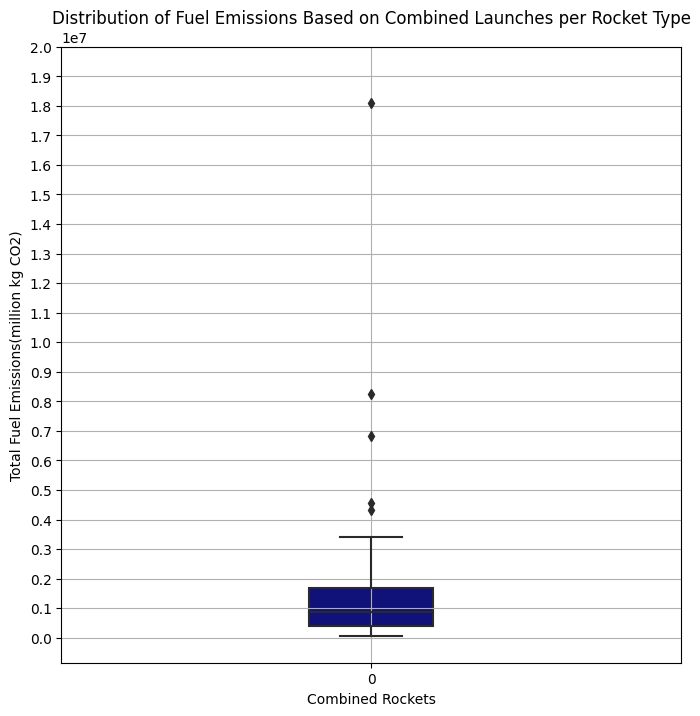

In [76]:
#Box plot to show the distribution of fuel emissions. 

plt.figure(figsize=(8,8))
sns.boxplot(fuel_type_emissions, color='darkblue', width=0.2)
plt.xlabel("Combined Rockets")
plt.ylabel("Total Fuel Emissions(million kg CO2)")
plt.title("Distribution of Fuel Emissions Based on Combined Launches per Rocket Type")
plt.yticks(np.linspace(0, 20000000, num=21))
plt.grid()
plt.show()

This boxplot shows the distribution of fuel emissions based on the combines launches of the rockets that were launched in 2019. You can see the majority of the rocket launches had total emissions of between 500,000 and just under 2 million kg of CO2. The outliers are significant to our analysis; the top highest outliers are SpaceX rockets as you will see in the box plot below. 

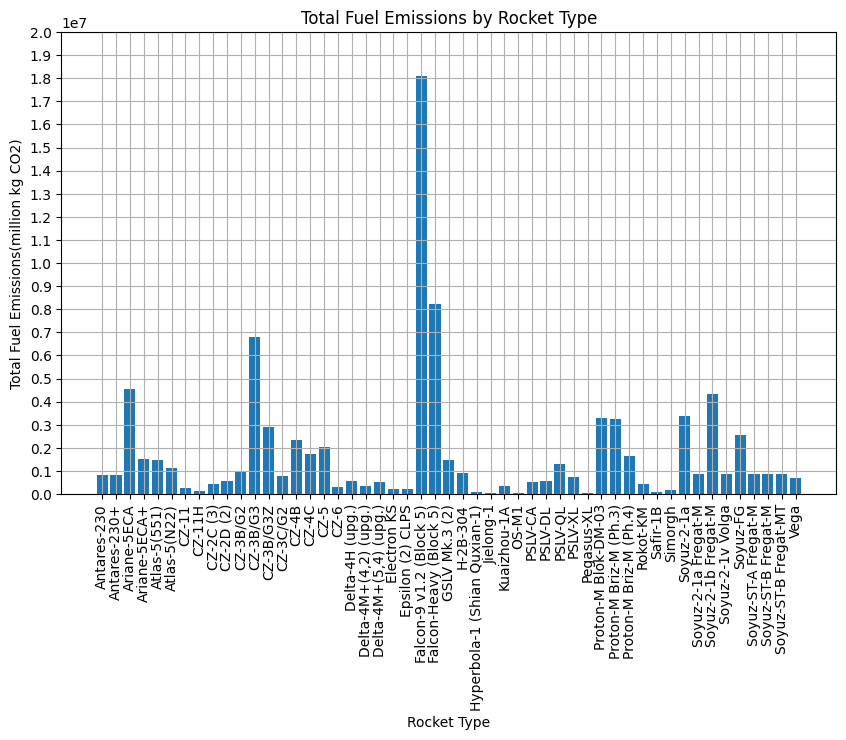

In [77]:
# Plot a bar graph to compare the total fuel emissions by Rocket Type

plt.figure(figsize=(10, 6))  
plt.bar(fuel_type_emissions.index, fuel_type_emissions.values)
plt.xlabel("Rocket Type")
plt.ylabel("Total Fuel Emissions(million kg CO2)")
plt.title("Total Fuel Emissions by Rocket Type")
plt.xticks(rotation=90)
plt.yticks(np.linspace(0, 20000000, num=21))
plt.grid()
plt.show()

The Falcon 9 v1.2 and the Falcon Heavy rockets are designed, developed and manufactured by SpaceX, a private aerospace company founded by Elon Musk. On the bar plot above, from the rocket launches in 2019 within the data we collected, the Falcon 9 v1.2 and the Falcon Heavy were the 2 Rockets with the highest emissions. **This graph does not take into consideration the number of rocket launches, therefore it could also be that the Falcon rockets have more emissions because they did more launches.** 

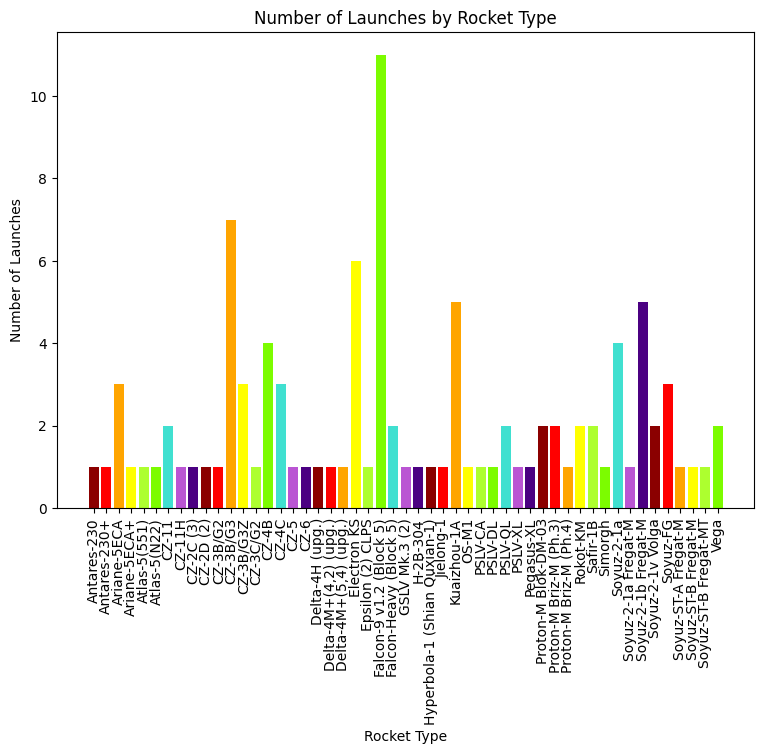

In [78]:
# Group the data by rocket type
grouped_data = all_launch_df.groupby("Rocket Type")

# Get the count of launches for each rocket type
launch_counts = grouped_data.size()
plt.figure(figsize=(9, 7))
colors = ['darkred', 'red', 'orange', 'yellow', 'greenyellow', 'lawngreen', 'turquoise', 'mediumorchid', 'indigo']
plt.bar(launch_counts.index, launch_counts.values, color=colors)
plt.xlabel('Rocket Type')
plt.ylabel('Number of Launches')
plt.title('Number of Launches by Rocket Type')
plt.subplots_adjust(bottom=0.2)
plt.xticks(np.arange(len(launch_counts)), launch_counts.index, rotation=90)

plt.show()

C:\Users\chhar\AppData\Local\Temp\ipykernel_16796\1374257448.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_companies)).colors


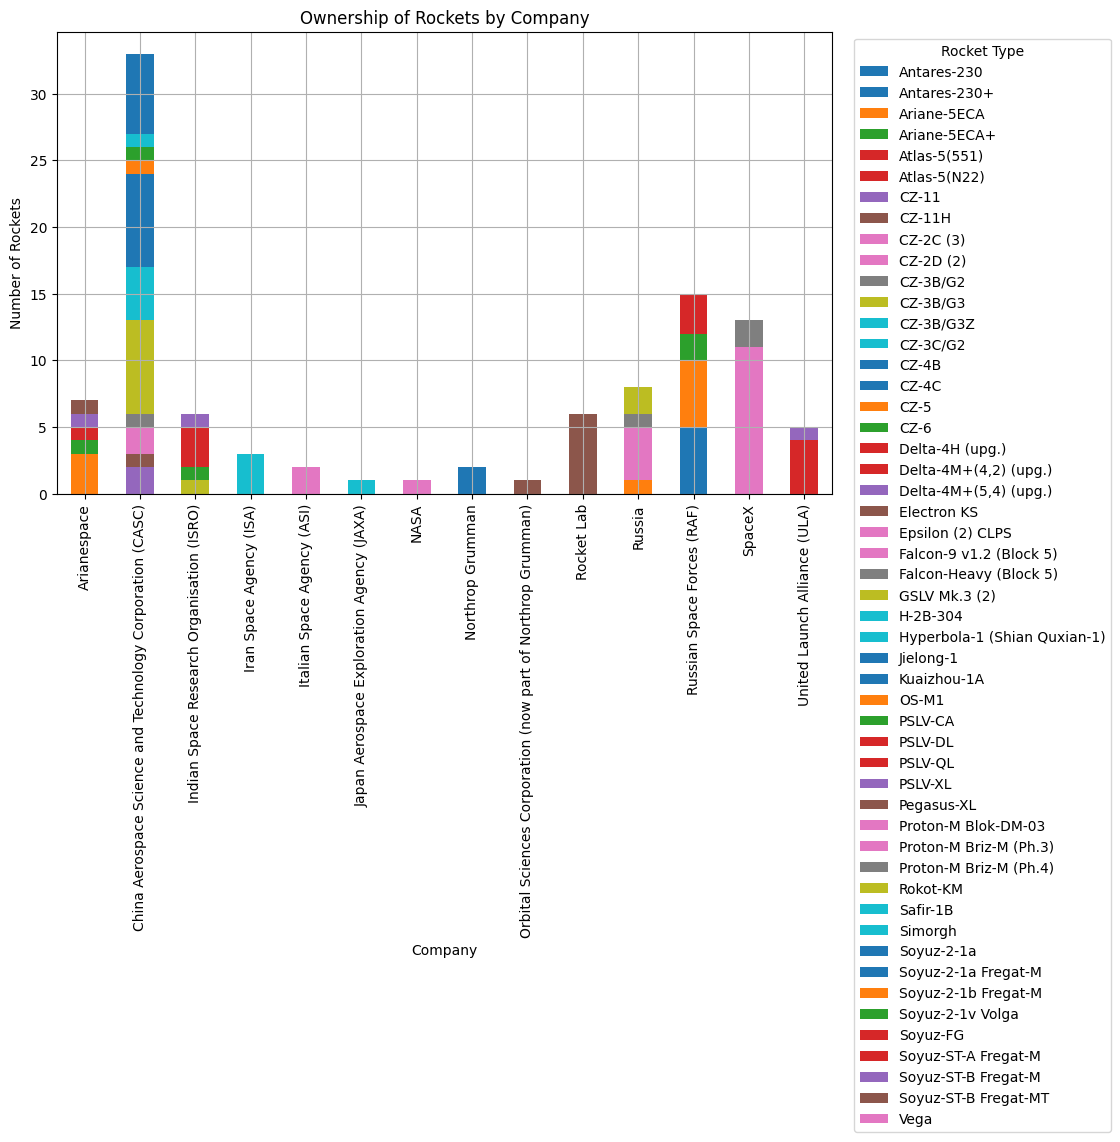

In [79]:
#ownership of rockets 

# Group data by Rocket Type and Company
grouped_data = all_launch_df.groupby(["Rocket Type", "Company"])

# Get the count of rockets for each Rocket Type and Company
rocket_counts = grouped_data.size().reset_index(name="Count")

# Pivot the data to create a new DataFrame with Rocket Type as columns and Company as index
pivot_df = rocket_counts.pivot(index="Company", columns="Rocket Type", values="Count")

# colours
unique_companies = rocket_counts["Company"].unique()
colors = plt.cm.get_cmap("tab10", len(unique_companies)).colors
fig, ax = plt.subplots(figsize=(10, 6))
pivot_df.plot(kind="bar", stacked=True, ax=ax, color=colors)

# Add labels, title, and legend
ax.set_xlabel("Company")
ax.set_ylabel("Number of Rockets")
ax.set_title("Ownership of Rockets by Company")
ax.legend(title="Rocket Type", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid()

plt.show()

In [80]:
all_launch_df.head()
sum_launch_company = all_launch_df.groupby('Company')['Rocket Type'].count()
sum_launch_company

Company
Arianespace                                                     7
China Aerospace Science and Technology Corporation (CASC)      33
Indian Space Research Organisation (ISRO)                       6
Iran Space Agency (ISA)                                         3
Italian Space Agency (ASI)                                      2
Japan Aerospace Exploration Agency (JAXA)                       1
NASA                                                            1
Northrop Grumman                                                2
Orbital Sciences Corporation (now part of Northrop Grumman)     1
Rocket Lab                                                      6
Russia                                                          8
Russian Space Forces (RAF)                                     15
SpaceX                                                         13
United Launch Alliance (ULA)                                    5
Name: Rocket Type, dtype: int64

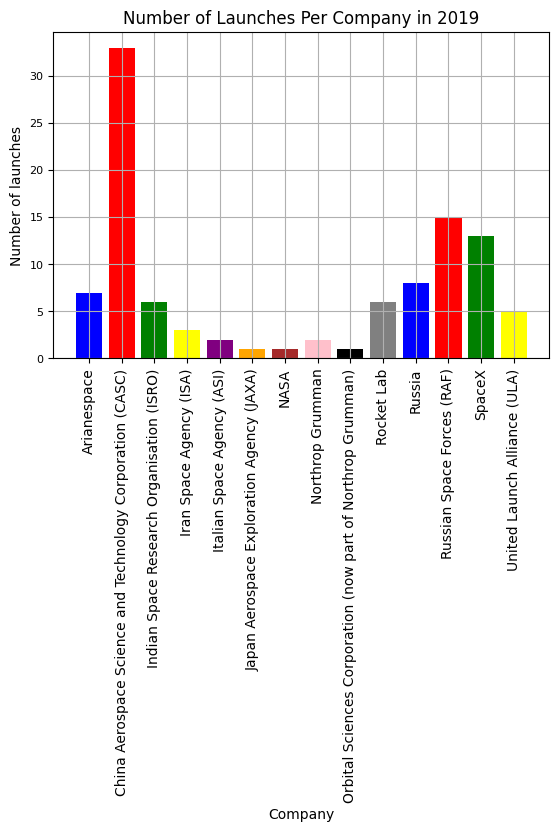

In [81]:
#number of launches per company 
# Group the data by company
grouped_data = all_launch_df.groupby("Company")

# Create a list of the number of launches per company
launches = []
for company, data in grouped_data:
    launches.append(len(data))

# bar graph of the data, grouped by company
plt.bar(grouped_data.groups.keys(), launches, color=['blue', 'red', 'green', 'yellow', 'purple', 'orange', 'brown', 'pink', 'black', 'gray'])

#labels to the axes
plt.xlabel("Company")
plt.ylabel("Number of launches")

# Title 
plt.title("Number of Launches Per Company in 2019")

#spacing to the bottom of the graph
plt.subplots_adjust(bottom=0.2)

#font size of the labels on the bottom
plt.yticks(fontsize=8)
plt.grid()


#numpy to make the spacing neater
plt.xticks(np.arange(len(grouped_data.groups.keys())), grouped_data.groups.keys(), rotation=90)

plt.show()

We found this interesting; CASC has more than double the amount of rocket launches than SpaceX, however they have managed to keep their total CO2 emissions for 2019 lower than SpaceX. This is due to the type of rocket fuel they have used, which we have analysed below. 

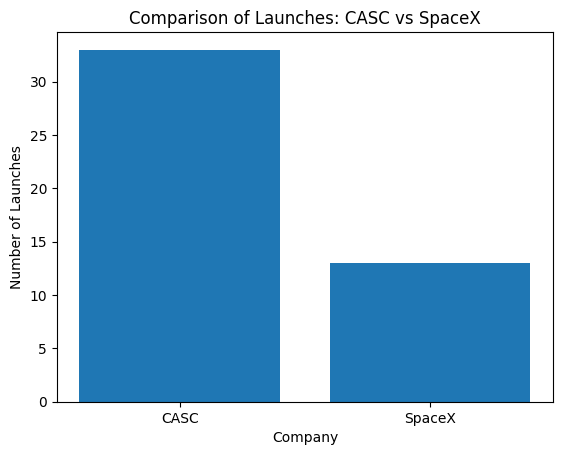

In [82]:
# Filter the data for CASC and SpaceX
casc_data = all_launch_df[all_launch_df["Company"] == "China Aerospace Science and Technology Corporation (CASC)"]
spacex_data = all_launch_df[all_launch_df["Company"] == "SpaceX"]

#number of launches for each company
casc_launch_count = len(casc_data)
spacex_launch_count = len(spacex_data)

#bar graph to compare the launch counts
companies = ["CASC", "SpaceX"]
launch_counts = [casc_launch_count, spacex_launch_count]

plt.bar(companies, launch_counts)
plt.xlabel("Company")
plt.ylabel("Number of Launches")
plt.title("Comparison of Launches: CASC vs SpaceX")

plt.show()

To analyse further why SpaceX Rockets have the highest emissions, we need to look at where the emissions are coming from. To do this we have chosen to compare the total emissions from rockets from 4 different companies from the year 2019; Falcon 9 from Space X, Epsilon (2) CLPS from NASA, CZ-3B/G3 from China Aerospace Science and Technology Corporation (CASC) and Soyuz-2-1a from Russian Space Forces (RAF).

In [83]:
fuel_types = all_launch_df[['Rocket Type', 'Kerosene mass (kg)', 'Hydrogen mass (kg)', 'Hypergolic mass (kg)', 'Solid fuel mass (kg)']]
rocket_types = ['Falcon-9 v1.2 (Block 5)', 'Epsilon (2) CLPS', 'CZ-3B/G3', 'Soyuz-2-1a']
fuel_types_df = all_launch_df[all_launch_df['Rocket Type'].isin(rocket_types)][['Rocket Type', 'Kerosene mass (kg)', 'Hydrogen mass (kg)', 'Hypergolic mass (kg)', 'Solid fuel mass (kg)']]
fuel_types_df

,Rocket Type,Kerosene mass (kg),Hydrogen mass (kg),Hypergolic mass (kg),Solid fuel mass (kg)
0,CZ-3B/G3,0.0,18200.0,383200.0,0.0
1,Falcon-9 v1.2 (Block 5),530200.0,0.0,0.0,0.0
2,Epsilon (2) CLPS,0.0,0.0,145.0,83500.0
8,Falcon-9 v1.2 (Block 5),530200.0,0.0,0.0,0.0
10,Falcon-9 v1.2 (Block 5),530200.0,0.0,0.0,0.0
11,CZ-3B/G3,0.0,18200.0,383200.0,0.0
16,CZ-3B/G3,0.0,18200.0,383200.0,0.0
18,Soyuz-2-1a,274180.0,0.0,0.0,0.0
22,CZ-3B/G3,0.0,18200.0,383200.0,0.0
24,Falcon-9 v1.2 (Block 5),530200.0,0.0,0.0,0.0


In [84]:
fuel_mass_sum = fuel_types_df.groupby('Rocket Type')[['Kerosene mass (kg)', 'Hydrogen mass (kg)', 'Hypergolic mass (kg)', 'Solid fuel mass (kg)']].sum()
fuel_mass_sum

,Kerosene mass (kg),Hydrogen mass (kg),Hypergolic mass (kg),Solid fuel mass (kg)
Rocket Type,,,,
CZ-3B/G3,0.0,127400.0,2682400.0,0.0
Epsilon (2) CLPS,0.0,0.0,145.0,83500.0
Falcon-9 v1.2 (Block 5),5832200.0,0.0,0.0,0.0
Soyuz-2-1a,1096720.0,0.0,0.0,0.0


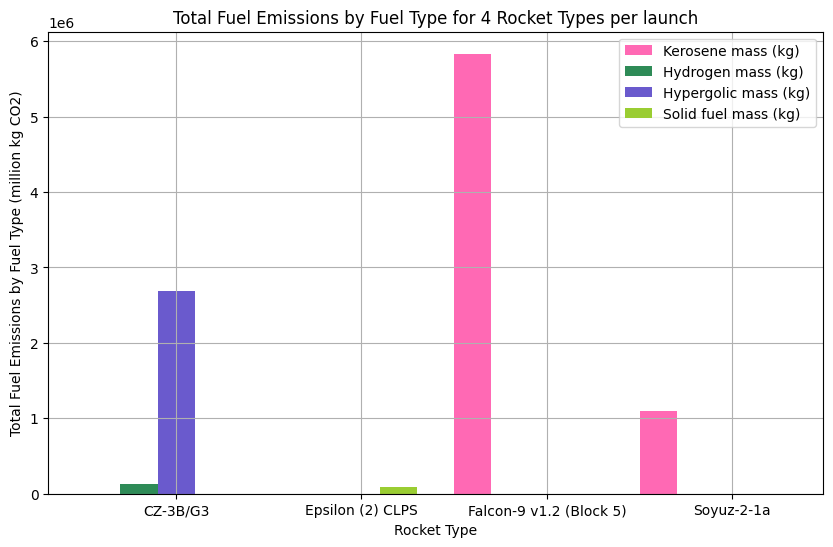

In [85]:
plt.figure(figsize=(10, 6))

bar_width = 0.2
bar_offset = bar_width * 2

x_positions = pd.RangeIndex(len(fuel_mass_sum))  # Numeric positions for the x-axis

plt.bar(x_positions - bar_offset, fuel_mass_sum['Kerosene mass (kg)'], label='Kerosene mass (kg)', color='hotpink', width=bar_width)
plt.bar(x_positions - bar_offset/2, fuel_mass_sum['Hydrogen mass (kg)'], label='Hydrogen mass (kg)', color='seagreen', width=bar_width)
plt.bar(x_positions, fuel_mass_sum['Hypergolic mass (kg)'], label='Hypergolic mass (kg)', color='slateblue', width=bar_width)
plt.bar(x_positions + bar_offset/2, fuel_mass_sum['Solid fuel mass (kg)'], label='Solid fuel mass (kg)', color='yellowgreen', width=bar_width)

plt.legend()
plt.xlabel('Rocket Type')
plt.ylabel('Total Fuel Emissions by Fuel Type (million kg CO2)')
plt.title('Total Fuel Emissions by Fuel Type for 4 Rocket Types per launch')
plt.grid()

plt.xticks(x_positions, fuel_mass_sum.index)  # Set the x-axis ticks and labels

plt.show()

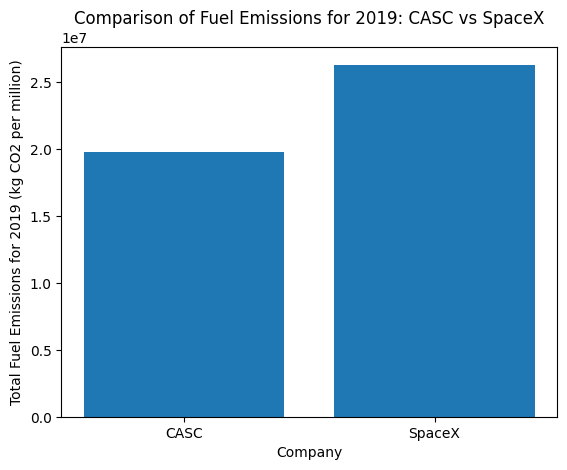

In [86]:
# Define the emission factors for each fuel type
kerosene_emission_factor = 3.1  # kg CO2 per kg of kerosene
hydrogen_emission_factor = 0.9  # kg CO2 per kg of hydrogen
hypergolic_emission_factor = 2.5  # kg CO2 per kg of hypergolic fuel
solid_fuel_emission_factor = 2.8  # kg CO2 per kg of solid fuel

# Calculate the total fuel emissions for each launch
all_launch_df['Total Fuel Emissions'] = (
    all_launch_df['Kerosene mass (kg)'] * kerosene_emission_factor +
    all_launch_df['Hydrogen mass (kg)'] * hydrogen_emission_factor +
    all_launch_df['Hypergolic mass (kg)'] * hypergolic_emission_factor +
    all_launch_df['Solid fuel mass (kg)'] * solid_fuel_emission_factor
)

# Group the launches by Company and calculate the total fuel emissions for each company
company_fuel_emissions = all_launch_df.groupby('Company')['Total Fuel Emissions'].sum()

# Filter ata for CASC and SpaceX
casc_fuel_emissions = company_fuel_emissions["China Aerospace Science and Technology Corporation (CASC)"]
spacex_fuel_emissions = company_fuel_emissions["SpaceX"]

#bar graph to compare the fuel emissions
companies = ["CASC", "SpaceX"]
fuel_emissions = [casc_fuel_emissions, spacex_fuel_emissions]

plt.bar(companies, fuel_emissions)
plt.xlabel("Company")
plt.ylabel("Total Fuel Emissions for 2019 (kg CO2 per million)")
plt.title("Comparison of Fuel Emissions for 2019: CASC vs SpaceX")
plt.show()

From the breakdown of Fuel Type and Rocket Type, you can see the Fuel Type that produces the most amount of emissions by far is Kerosene. Kerosene is is used in liquid fueled rocket engines. It is a refined form of kerosene fuel that has been purified and processed to meet the requirements for rocket propulsion(i.e. the process of expelling fuel to propel a rocket into space). It is the only type of Rocket Fuel used in Rocket launches by SpaceX in 2019. China Aerospace Science and Technology Corporation (CASC) has used Hypergolic Fuel and Hydrogen Fuel instead of Kerosene Fuel.

The emission factors are: 
- Kerosene: 3.1 kg CO2 per kg of kerosene 
- Hydrogen: 0.9 kg CO2 per kg of hydrogen 
- Hypergolic fuel: 2.5 kg CO2 per kg of hypergolic. 

Therefore, per launch Falcon-9 produces nearly 6 million kg of CO2 in comparison with CASC's almost 3 million of CO2 emissions. In total in 2019, SpaceX has had 13 launches, with a total of over 26 million kg of CO₂ emissions. CASC has had 33 rocket launches with only 20 million kg of CO₂ emissions - this is over double the amount of rocket launches, and half the amount of CO₂ emissions.

As SpaceX moves forward, one pathway they could look into is using a more environmentally friendly fuel type with less CO2 emissions, such as Hydroden fuel. Hydrogen Fuel offers the potential for significantly reduced environmental impact compared to traditional rocket fuels due to the main byproduct being water vapour, making it a clean and intruiging option. This is particularly important as the aerospace industry seeks to reduce its carbon footprint and mitigate the effects of greenhouse gas emissions. Efficiency and Performance: Hydrogen fuel has a higher specific impulse (thrust efficiency) compared to many other rocket fuels. It provides a higher exhaust velocity, allowing rockets to achieve greater speeds and carry heavier payloads. This increased efficiency can lead to more cost-effective launches and enable the exploration of deeper space missions. Abundance and Availability: Hydrogen is the most abundant element in the universe and can be obtained from various sources, including water and renewable energy sources. Its availability makes it a potentially sustainable and long-term fuel option for space exploration. Additionally, advancements in hydrogen production technologies, such as electrolysis powered by renewable energy, can further enhance the sustainability of hydrogen fuel.Versatility and Compatibility: Hydrogen fuel is compatible with a wide range of rocket engine designs and can be used in combination with different oxidizers, such as liquid oxygen (LOX), to create a combustible mixture. This versatility allows for flexibility in designing rocket systems and optimizing performance based on mission requirements. Technological Advancements: Researching and developing hydrogen fuel technologies for rocket launches can drive innovation and technological advancements in propulsion systems. This can lead to improvements in engine efficiency, storage and handling techniques, and overall launch capabilities. Additionally, the knowledge gained from hydrogen fuel research can have potential applications in other sectors, such as transportation and energy production. While there are challenges to overcome in terms of hydrogen storage, handling, and infrastructure, ongoing research and investment in hydrogen fuel technology can address these hurdles and pave the way for a greener and more efficient future for rocket launches. By harnessing the benefits of hydrogen fuel, the aerospace industry can contribute to a more sustainable and environmentally conscious approach to space exploration.

## BONUS QUESTION (Machine learning): Predict the amount of space debris is X amount of years.

So I didn't manage to predict the amount of SpaceX debris, but I *think* I made a model to predict the **type** of SpaceX debris.

In [87]:
df_space_decay.head(2)

,CCSDS_OMM_VERS,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,EPOCH,MEAN_MOTION,ECCENTRICITY,...,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,TLE_LINE0,TLE_LINE1,TLE_LINE2
13823,2,THOR ABLESTAR DEB,1961-015MT,EARTH,TEME,UTC,SGP4,2021-10-30T02:13:02.296416,14.295049,0.003953,...,821.739,765.038,DEBRIS,SMALL,US,1961.0,AFETR,0 THOR ABLESTAR DEB,1 48815U 61015MT 21303.09238769 .00003359 0...,2 48815 65.8151 111.3248 0039532 262.2251 97...
13834,2,THOR ABLESTAR DEB,1961-015NE,EARTH,TEME,UTC,SGP4,2021-10-31T21:41:01.230144,14.262516,0.004730,...,838.265,770.314,DEBRIS,SMALL,US,1961.0,AFETR,0 THOR ABLESTAR DEB,1 48826U 61015NE 21304.90348646 .00000558 0...,2 48826 66.5975 113.6490 0047304 97.3332 337...


In [88]:
df_space_decay.groupby('OBJECT_TYPE')['LAUNCH_DATE'].sum()

OBJECT_TYPE
DEBRIS         16533774.0
PAYLOAD         9968178.0
ROCKET BODY     1488769.0
TBA              419865.0
Name: LAUNCH_DATE, dtype: object

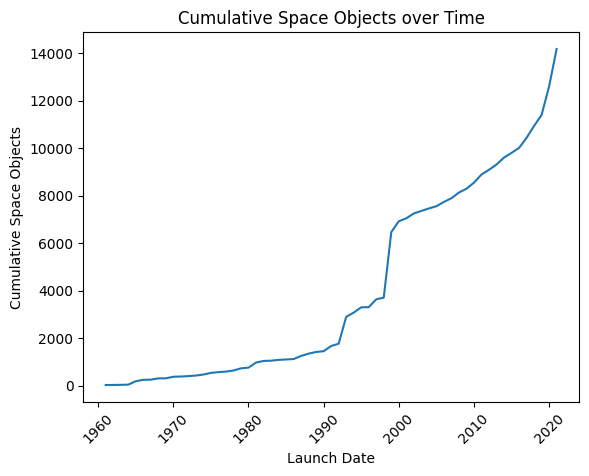

In [89]:
df_space_decay = df_space_decay.sort_values('LAUNCH_DATE')
# Group the data by 'LAUNCH_DATE' and calculate the cumulative sum of space objects
cumulative_space_objects = df_space_decay['LAUNCH_DATE'].value_counts().sort_index().cumsum()
# Creating a line plot
plt.plot(cumulative_space_objects.index, cumulative_space_objects.values)
# Adding labels and title
plt.xlabel('Launch Date')
plt.ylabel('Cumulative Space Objects')
plt.title('Cumulative Space Objects over Time')
# Rotating the x-axis labels if needed
plt.xticks(rotation=45)
# Displaying the plot
plt.show()

In [90]:
X = df_space_decay['LAUNCH_DATE']
Y = df_space_decay['OBJECT_TYPE']

In [91]:
df_space_decay = pd.get_dummies(df_space_decay, columns=['OBJECT_TYPE'])

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [93]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(11339,)
(2835,)
(11339,)
(2835,)


In [94]:
logreg = LogisticRegression()
logreg.fit(X_train.values.reshape(-1, 1), Y_train)

LogisticRegression()

In [95]:
logreg.predict(X_test.values.reshape(-1,1))

array(['DEBRIS', 'DEBRIS', 'DEBRIS', ..., 'DEBRIS', 'DEBRIS', 'DEBRIS'],
      dtype=object)

In [96]:
X_test_array = np.array(X_test)
X_test_reshaped = X_test_array.reshape(-1, 1)
accuracy = logreg.score(X_test_reshaped, Y_test)

print("Accuracy on test data: {:.2f}%".format(accuracy * 100))

Accuracy on test data: 57.99%
